# **Customer segmentation**

Main goals :
1. No frills, straight to the point, follow the step by step guide
2. Full English


# **Milestone 1** : Analyse exploratoire

## Conseils

**Livrable** : Notebook, partie préparation du fichier des commandes et de son analyse exploratoire.

**Charge** : 10 %

**Problèmes et erreurs courants** :
* ⚠ L'identifiant unique d’un client est le `customer_unique_id`, à utiliser pour regrouper les commandes par client (un `customer_id` différent est associé à chaque commande).

**Recommandations** :
* **M11** [21/11] Analyser le contenu de chaque table mise à disposition (features, valeurs).
* **M12** [21/11] Préparer un fichier de commandes, par `merge` des différentes tables.
* **M13** [21/11] Réaliser un `describe`, vérifier s’il y a des valeurs manquantes.
* **M14** [21/11] Analyser par exemple la distribution du nombre de commandes par client, la distribution des montants, la distribution des catégories des produit etc.
* **M15** [21/11] L’étudiant constatera que seuls 3 % des clients ont réalisé plus d’une commande.

## Tips

**Deliverable**: Notebook, preparation part of the order file and its exploratory analysis.

**Load**: 10%

**Common problems and errors**:
* ⚠ The unique identifier of a customer is the `customer_unique_id`, to be used to group orders by customer (a different `customer_id` is associated with each order).

**Recommendations**:
* **M11** [21/11] Analyze the content of each table made available (features, values).
* **M12** [21/11] Prepare a order file, by `merge` of the different tables.
* **M13** [21/11] Perform a `describe`, check if there are missing values.
* **M14** [21/11] Analyze, for instance, the distribution of the number of orders per customer, the distribution of amounts, the distribution of product categories, etc.
* **M15** [21/11] The student will notice that only 3% of customers have made more than one order.

## Tasks

* ✔ **M111** [21/11→21/11] (0,5) - Entity-relation diagram.
* ✔ **M112** [21/11→21/11] (0,5) - Small utility functions, like `get_payment_types()`, etc: lists of modalities, filling rate, basic stats.
* **M113** [21/11→...] (...) - Evaluate (qualifiy in particular the arity) each of the 7 relations between tables.
* **M114** [21/11→...] (...) - Retrieve and update my pk analysis function developed as part of the WB EdStats project. Check that it remains relevant and generic.
* **M115** [21/11→...] (...) - For payments and reviews, there is still a bit of analytical work to be done to fully understand..
* ✔ **M121** [21/11→21/11] (1) - Capitalize the mega-join in a function, and cf. recommendations, use `customer_unique_id` instead of `customer_id`.
    * ✔ **M121** [21/11→29/11] (1,5) - Still to do : integration of `order_payments` and `order_reviews`
* **M131** [21/11→...] (...) - Make a table of variables cf. GSheet analysis, but simpler and more tailor-made, for example with an `is_pk` column.
* **M132** [21/11→...] (...) - Finish inspecting for missing value cases
* **M133** [21/11→...] (...) - Reproduce each individual table by derivation from the main aggregate table, using `groupby` to derive all useful empirical summaries
    * ✔ **M1331** [21/11→30/11] (2,75) - `get_unique_customers()` : derived table of unique customers with their locations condensed into a single tree (dict) feature (dict states > cities > zips > customer_ids).
    * ✔ **M1332** [21/11→30/11] (2,00) - `get_aggregated_order_payments()` : derived table of amount paid for an order, in one or more instalments : first step of feature engineering, with sum of order payments.
* **M134** [21/11→...] (...) - Extract the implicit table of items, and output some statistics about them. Reply to the question: do all orders have all 21 items ?
* **M141** [21/11→...] (...) - Analyze the distribution of the number of orders per customer, the distribution of amounts, product categories.
* **M142** [21/11→...] (...) - Make lots of nice relational sns graphics
* ✔  **M16** [02/12→03/12] (1.00) - Special case indexes

## 1} Table contents analysis

<img src='../img/relational_schema.jpg' alt='database relational schema' width='500' height='400'/>

In [3]:
from pepper_commons import (
    discrete_stats,
    plot_value_freqs
)
from olist_commons import *

### Customers

In [4]:
customers = get_customers()
display(discrete_stats(customers, 'customers'))

,n,n_u,n_na,fr,vr
customers,,,,,
customer_id,99441,99441,0,1.0,1.000000
customer_unique_id,99441,96096,0,1.0,0.966362
customer_zip_code_prefix,99441,14994,0,1.0,0.150783
customer_city,99441,4119,0,1.0,0.041422
customer_state,99441,27,0,1.0,0.000272


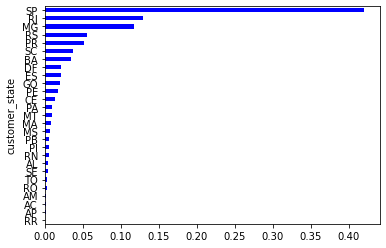

In [3]:
plot_value_freqs(customers, 'customer_state')

#### ⚠ uniqueness of `customer_unique_id`

The analysis below shows that `customer_unique_id` is not a primary key.

There are indeed 248 duplicates and even 4 triplets.

These results lead to the conclusion that some customers are nomads or have moved.

This marginal point having been raised (it concerns 0.25% of customers), we assume that Olist knows what it is doing, and that if the customer is identified as unique, it is not an error. On the other hand, keep in mind that its location can be variable, even if in 99.75% of cases, it remains constant.

In [8]:
# on supprime la colonne customer_id et on déduplique
unique_customers = customers[customers.columns[1:]].copy()
display(unique_customers)
unique_customers = unique_customers.drop_duplicates()
display(unique_customers)
# si customer_unique_id n'est pas une pk, il y a un pb
display(discrete_stats(unique_customers, 'unique_customers'))

customers,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


customers,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


,n,n_u,n_na,fr,vr
unique_customers,,,,,
customer_unique_id,96352,96096,0,1.0,0.997343
customer_zip_code_prefix,96352,14994,0,1.0,0.155617
customer_city,96352,4119,0,1.0,0.042750
customer_state,96352,27,0,1.0,0.000280


Let's explore these duplicates (248 doubles and even 4 triplets)

In [11]:
vc = unique_customers.customer_unique_id.value_counts()
display(vc[vc > 1])

3e43e6105506432c953e165fb2acf44c    3
d44ccec15f5f86d14d6a2cfa67da1975    3
b9badb100ff8ecc16a403111209e3a06    3
9832ae2f7d3e5fa4c7a1a06e9551bc61    3
004b45ec5c64187465168251cd1c9c2f    2
                                   ..
e7688fef5438be571d0c39bbb3e8e998    2
e35b2a3c980b6e0fc66c66b8e1122e93    2
9b7fcde05dd369caf4dea1f04ed39fcc    2
f113042ff356f926d517f3087d4a1ba8    2
6345e3b3ba5ee47685e29ec5febc8155    2
Name: customer_unique_id, Length: 252, dtype: int64

Let's visualize the triplets

In [13]:
triple_index = vc[vc > 2].index
display(triple_index)

Index(['3e43e6105506432c953e165fb2acf44c', 'd44ccec15f5f86d14d6a2cfa67da1975',
       'b9badb100ff8ecc16a403111209e3a06', '9832ae2f7d3e5fa4c7a1a06e9551bc61'],
      dtype='object')

In [15]:
bindex = unique_customers.customer_unique_id.isin(triple_index)
display(unique_customers[bindex].sort_values(by='customer_unique_id'))

unique_customers,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5113,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
6129,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
20597,3e43e6105506432c953e165fb2acf44c,11704,praia grande,SP
30846,9832ae2f7d3e5fa4c7a1a06e9551bc61,25213,duque de caxias,RJ
68788,9832ae2f7d3e5fa4c7a1a06e9551bc61,20520,rio de janeiro,RJ
74754,9832ae2f7d3e5fa4c7a1a06e9551bc61,25212,duque de caxias,RJ
20287,b9badb100ff8ecc16a403111209e3a06,3014,sao paulo,SP
72560,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC
92205,b9badb100ff8ecc16a403111209e3a06,88085,florianopolis,SC
45851,d44ccec15f5f86d14d6a2cfa67da1975,3533,sao paulo,SP


### Geolocation

In [5]:
geolocation = get_geolocation()
display(discrete_stats(geolocation, 'geolocation'))

,n,n_u,n_na,fr,vr
geolocation,,,,,
geolocation_zip_code_prefix,1000163,19015,0,1.0,0.019012
geolocation_lat,1000163,717360,0,1.0,0.717243
geolocation_lng,1000163,717613,0,1.0,0.717496
geolocation_city,1000163,8011,0,1.0,0.008010
geolocation_state,1000163,27,0,1.0,0.000027


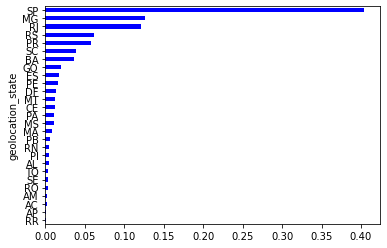

In [6]:
plot_value_freqs(geolocation, 'geolocation_state')

### Order items

In [7]:
order_items = get_order_items()
display(discrete_stats(order_items, 'order_items'))

,n,n_u,n_na,fr,vr
order_items,,,,,
order_id,112650,98666,0,1.0,0.875863
order_item_id,112650,21,0,1.0,0.000186
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


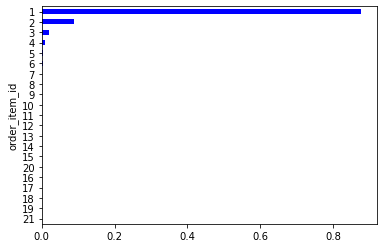

In [9]:
plot_value_freqs(order_items, 'order_item_id')

### Order payments

**Note** A *boleto* is a ticket

In [10]:
order_payments = get_order_payments()
display(discrete_stats(order_payments, 'order_payments'))

,n,n_u,n_na,fr,vr
order_payments,,,,,
order_id,103886,99440,0,1.0,0.957203
payment_sequential,103886,29,0,1.0,0.000279
payment_type,103886,5,0,1.0,0.000048
payment_installments,103886,24,0,1.0,0.000231
payment_value,103886,29077,0,1.0,0.279893


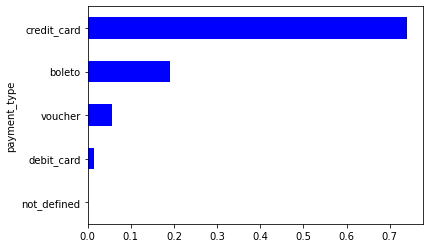

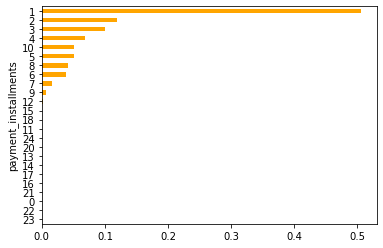

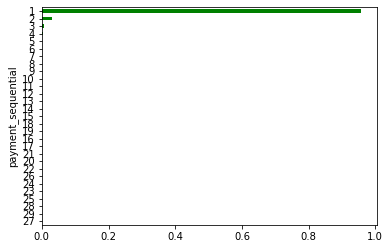

In [11]:
plot_value_freqs(order_payments, 'payment_type')
plot_value_freqs(order_payments, 'payment_installments', c='orange')
plot_value_freqs(order_payments, 'payment_sequential', c='green')

#### xx à revoir

We check that apart from payment_sequential and payment_value, for a given order_id, payment_type and payment_installments are identical.

The majority of payments are made in one go. We reduce the table by distributing on 3 columns the amounts of regulations 1, 2, and everything else.

Bon, ma théorie à revoir..

In [52]:
truc = order_payments[['order_id', 'payment_type', 'payment_installments']]
display(truc)
display(truc[truc.duplicated()])

,order_id,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,1
103882,7b905861d7c825891d6347454ea7863f,credit_card,2
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5


,order_id,payment_type,payment_installments
2324,e6a66a8350bb88497954d37688ab123e,voucher,1
2707,1be51feefcd481bee3118900e6777057,voucher,1
2874,a3a97bc6e236d5351537c8f466c34dad,voucher,1
3256,370e2e6c1a9fd451eb7f0852daa3b006,voucher,1
3497,4a686b47e7eecbd136617bf8ae7c9af4,voucher,1
...,...,...,...
103551,1ea11b975aea60ca92fa0559184d3d34,voucher,1
103569,fedcd9f7ccdc8cba3a18defedd1a5547,voucher,1
103649,39d8500c0e37306e6bf2c13d7f298972,credit_card,4
103747,cf101c3abd3c061ca9f78c1bbb1125af,voucher,1


In [65]:
couples = [(a, b) for a, b in zip(truc.payment_type, truc.payment_installments)]
machin = pd.DataFrame({'order_id': truc.order_id, 'couples': couples})
display(machin)
bidule = machin.groupby(by='order_id').count()
display(bidule.couples.unique())
display(bidule[bidule.couples > 1])
display(truc[truc.order_id == '009ac365164f8e06f59d18a08045f6c4'])
display(order_payments[order_payments.order_id == '009ac365164f8e06f59d18a08045f6c4'])


,order_id,couples
0,b81ef226f3fe1789b1e8b2acac839d17,"(credit_card, 8)"
1,a9810da82917af2d9aefd1278f1dcfa0,"(credit_card, 1)"
2,25e8ea4e93396b6fa0d3dd708e76c1bd,"(credit_card, 1)"
3,ba78997921bbcdc1373bb41e913ab953,"(credit_card, 8)"
4,42fdf880ba16b47b59251dd489d4441a,"(credit_card, 2)"
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,"(boleto, 1)"
103882,7b905861d7c825891d6347454ea7863f,"(credit_card, 2)"
103883,32609bbb3dd69b3c066a6860554a77bf,"(credit_card, 1)"
103884,b8b61059626efa996a60be9bb9320e10,"(credit_card, 5)"


array([ 1,  2,  6,  3,  7,  4,  5,  9, 11, 12, 10, 15,  8, 22, 14, 13, 21,
       26, 19, 29], dtype=int64)

,couples
order_id,
0016dfedd97fc2950e388d2971d718c7,2
002f19a65a2ddd70a090297872e6d64e,2
0071ee2429bc1efdc43aa3e073a5290e,2
009ac365164f8e06f59d18a08045f6c4,6
00b4a910f64f24dbcac04fe54088a443,2
...,...
ff7400d904161b62b6e830b3988f5cbd,2
ff978de32e717acd3b5abe1fb069d2b6,4
ffa1dd97810de91a03abd7bd76d2fed1,2


,order_id,payment_type,payment_installments,couple
285,009ac365164f8e06f59d18a08045f6c4,voucher,1,"(voucher, 1)"
15298,009ac365164f8e06f59d18a08045f6c4,voucher,1,"(voucher, 1)"
16053,009ac365164f8e06f59d18a08045f6c4,credit_card,1,"(credit_card, 1)"
16459,009ac365164f8e06f59d18a08045f6c4,voucher,1,"(voucher, 1)"
32058,009ac365164f8e06f59d18a08045f6c4,voucher,1,"(voucher, 1)"
73837,009ac365164f8e06f59d18a08045f6c4,voucher,1,"(voucher, 1)"


,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.5
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


### Order reviews

In [12]:
order_reviews = get_order_reviews()
display(discrete_stats(order_reviews, 'order_reviews'))

,n,n_u,n_na,fr,vr
order_reviews,,,,,
review_id,99224,98410,0,1.000000,0.991796
order_id,99224,98673,0,1.000000,0.994447
review_score,99224,5,0,1.000000,0.000050
review_comment_title,11568,4527,87656,0.116585,0.391338
review_comment_message,40977,36159,58247,0.412975,0.882422
review_creation_date,99224,636,0,1.000000,0.006410
review_answer_timestamp,99224,98248,0,1.000000,0.990164


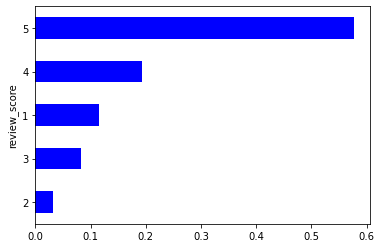

In [13]:
plot_value_freqs(order_reviews, 'review_score')

### Orders

`order_id` and `customer_id` are both primary keys.

Either can be used to individually identify each record.

Some dates (`'order_approved_at'`, `'order_delivered_carrier_date'`, `'order_delivered_customer_date'`) are not yet known, certainly in the case of orders being currently processed.

In [14]:
orders = get_orders()
display(discrete_stats(orders, 'orders'))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


Most of the orders have been completed, that is, are `delivered`. The few orders that are in other states correspond to orders being currently processed.

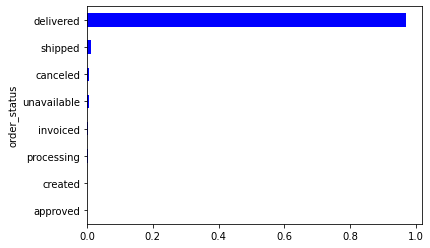

In [15]:
plot_value_freqs(orders, 'order_status')

### Products

There are 32 951 products.

`product_id` is the primary key.

2 products have neither dimensions nor weight.

610 products do not have sheet to present them.

In [4]:
products = get_products()
display(discrete_stats(products, 'products'))

,n,n_u,n_na,fr,vr
products,,,,,
product_id,32951,32951,0,1.000000,1.000000
product_category_name,32341,73,610,0.981488,0.002257
product_name_lenght,32341,66,610,0.981488,0.002041
product_description_lenght,32341,2960,610,0.981488,0.091525
product_photos_qty,32341,19,610,0.981488,0.000587
product_weight_g,32949,2204,2,0.999939,0.066891
product_length_cm,32949,99,2,0.999939,0.003005
product_height_cm,32949,102,2,0.999939,0.003096
product_width_cm,32949,95,2,0.999939,0.002883


2 products have neither dimensions nor weight.

One of them doesn't have a product sheet either : we will call it the unknown product.

In [7]:
display(products[products.product_weight_g.isna()])

products,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


610 products do not have product sheet to present them :

In [6]:
display(products[products.product_category_name.isna()])

products,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


### Sellers

There are 3 095 sellers.

`seller_id` is the primary key.

The only data on sellers is the `(state, city, zip_code)` location.

The name of the seller is not even indicated.

In [18]:
sellers = get_sellers()
display(discrete_stats(sellers, 'sellers'))

,n,n_u,n_na,fr,vr
sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
seller_zip_code_prefix,3095,2246,0,1.0,0.725687
seller_city,3095,611,0,1.0,0.197415
seller_state,3095,23,0,1.0,0.007431


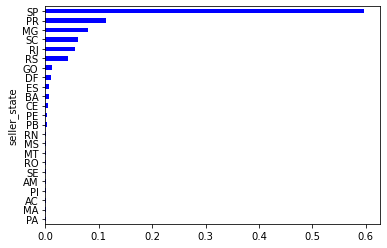

In [19]:
plot_value_freqs(sellers, 'seller_state')

### Category name SP | EN translation

Associative table of the 71 categories, in Spanish and in English.

In [20]:
cats = get_cats()
display(discrete_stats(cats, 'cats'))

,n,n_u,n_na,fr,vr
cats,,,,,
product_category_name,71,71,0,1.0,1.0
product_category_name_english,71,71,0,1.0,1.0


In [24]:
display(cats.product_category_name_english)

0                 health_beauty
1         computers_accessories
2                          auto
3                bed_bath_table
4               furniture_decor
                ...            
66                      flowers
67        arts_and_craftmanship
68          diapers_and_hygiene
69    fashion_childrens_clothes
70        security_and_services
Name: product_category_name_english, Length: 71, dtype: object

### Special case indexes

#### Unpaid orders

In [ ]:
# 1/ La commande non payée
from olist_commons import get_unpaid_order_ids
unpaid_order_ids = get_unpaid_order_ids()
display(unpaid_order_ids)

# TODO 2/ par extension, comparer les prix + fret à ce qui a été réglé
# ca c'est une vraie extension qui appelle la synthèse des price et freight_value par order


['bfbd0f9bdef84302105ad712db648a6c']

#### Incompletly featured products

In [1]:
import pandas as pd
from pepper_commons import bold
from olist_commons import (
    get_without_physical_features_product_ids,
    get_without_marketing_features_product_ids,
    get_unknown_product_ids,
)

print(bold('physical features missing'), ':')
display(get_without_physical_features_product_ids())

print(bold('marketing features missing'), ':')
display(get_without_marketing_features_product_ids())

print(bold('all features missing'), ':')
display(get_unknown_product_ids())


physical features missing :


Index(['09ff539a621711667c43eba6a3bd8466', '5eb564652db742ff8f28759cd8d2652a'], dtype='object')

marketing features missing :


Index(['a41e356c76fab66334f36de622ecbd3a', 'd8dee61c2034d6d075997acef1870e9b',
       '56139431d72cd51f19eb9f7dae4d1617', '46b48281eb6d663ced748f324108c733',
       '5fb61f482620cb672f5e586bb132eae9', 'e10758160da97891c2fdcbc35f0f031d',
       '39e3b9b12cd0bf8ee681bbc1c130feb5', '794de06c32a626a5692ff50e4985d36f',
       '7af3e2da474486a3519b0cba9dea8ad9', '629beb8e7317703dcc5f35b5463fd20e',
       ...
       '8a27d3427a61686ec37357b5ccf24425', '9549bc9cccdcfb09de0bd4774b018c3d',
       'b2545dd62c61d45d55ebaa04d1cb1e23', 'd886830f276eaa72305b18639bc4cfce',
       '22e8a1571e0f8e1aeac77c01ae28539c', 'b0a0c5dd78e644373b199380612c350a',
       '10dbe0fbaa2c505123c17fdc34a63c56', 'bd2ada37b58ae94cc838b9c0569fecd8',
       'fa51e914046aab32764c41356b9d4ea4', 'c4ceee876c82b8328e9c293fa0e1989b'],
      dtype='object', length=610)

all features missing :


Index(['5eb564652db742ff8f28759cd8d2652a'], dtype='object')

## 2} Joining tables around the `order_items` table

We perform an outer join (union) so as not to exclude any available data from either table, even if it means producing NAs to then obviously be kept under control.

In [1]:
from olist_commons import get_merged_data
data = get_merged_data()
display(data)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaN,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,...,1,boleto,1,210.09,396e26da77b10734f3f8b5d5515fef4e,1,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09 00:00:00,2018-02-09 10:12:45
119139,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaN,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,...,1,voucher,1,63.89,16d3db296c46b4411dfc5f8bde882e6d,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 16:26:05
119140,a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,NaN,NaN,NaN,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,...,1,voucher,1,107.13,047fd109ced39e02296f6aeb74f6a6f1,4,NaN,NaN,2018-07-31 00:00:00,2018-08-02 15:11:49
119141,a69ba794cc7deb415c3e15a0a3877e69,NaN,NaN,NaN,NaN,NaN,NaN,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,...,1,credit_card,2,195.91,41b9de18e0dd1e085e3c402d1c9b87d0,1,NaN,Fiz a compra do produto para presentear uma pe...,2017-09-20 00:00:00,2017-09-20 11:20:09


## 3} Tables normalization and robust merge

...

In [7]:
from olist_commons import discrete_stats
display(discrete_stats(data, 'main table'))

,n,n_u,n_na,fr,vr
main table,,,,,
order_id,119143,99441,0,1.000000,0.834636
order_item_id,118310,21,833,0.993008,0.000177
product_id,118310,32951,833,0.993008,0.278514
seller_id,118310,3095,833,0.993008,0.026160
shipping_limit_date,118310,93318,833,0.993008,0.788758
price,118310,5968,833,0.993008,0.050444
freight_value,118310,6999,833,0.993008,0.059158
customer_id,119143,99441,0,1.000000,0.834636
order_status,119143,8,0,1.000000,0.000067


### Customers

There are 96 096 customers.

In [12]:
from olist_commons import get_customers
customers = get_customers()
display(discrete_stats(customers, 'customers'))

,n,n_u,n_na,fr,vr
customers,,,,,
customer_id,99441,99441,0,1.0,1.000000
customer_unique_id,99441,96096,0,1.0,0.966362
customer_zip_code_prefix,99441,14994,0,1.0,0.150783
customer_city,99441,4119,0,1.0,0.041422
customer_state,99441,27,0,1.0,0.000272


In [1]:
from olist_commons import get_unique_customers
unique_customers = get_unique_customers()
display(unique_customers)

,locations
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,{'SP': {'cajamar': {7787: ('fadbb3709178fc513a...
0000b849f77a49e4a4ce2b2a4ca5be3f,{'SP': {'osasco': {6053: ('4cb282e167ae9234755...
0000f46a3911fa3c0805444483337064,{'SC': {'sao jose': {88115: ('9b3932a6253894a0...
0000f6ccb0745a6a4b88665a16c9f078,{'PA': {'belem': {66812: ('914991f0c02ef0843c0...
0004aac84e0df4da2b147fca70cf8255,{'SP': {'sorocaba': {18040: ('47227568b10f5f58...
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,{'PE': {'sanharo': {55250: ('74be082247cd677a1...
fffea47cd6d3cc0a88bd621562a9d061,{'BA': {'feira de santana': {44054: ('0ecf8e0a...
ffff371b4d645b6ecea244b27531430a,{'MT': {'sinop': {78552: ('27f584b0f1dc4e61006...


### Geolocation

The geolocation specify many GPS coordinates, each related to one 3-key `(state, city, zip_code)`.

This geodata can be left joined to customers table.

#### Check diff between `geolocation` and `cutomers`'s `(state, city, zip_code)` unique keys

There are 15034 `(state, city, zip_code)` 3-keys in `customers`.

In [11]:
from olist_commons import get_customers
customers = get_customers()
customers_scz_keys = customers[[
    'customer_state',
    'customer_city',
    'customer_zip_code_prefix'
]].copy().drop_duplicates()
customers_scz_keys.columns = ['state', 'city', 'zip_code']
display(customers_scz_keys)

,state,city,zip_code
0,SP,franca,14409
1,SP,sao bernardo do campo,9790
2,SP,sao paulo,1151
3,SP,mogi das cruzes,8775
4,SP,campinas,13056
...,...,...,...
99376,PR,paicandu,87145
99379,RS,eugenio de castro,98860
99382,SP,sao paulo,5538
99406,GO,aparecida de goiania,74980


There are 27912 `(state, city, zip_code)` 3-keys in `geolocation`.

In [13]:
from olist_commons import get_geolocation
geolocation = get_geolocation()
# display(discrete_stats(geolocation, 'geolocation'))
geolocation_scz_keys = geolocation[[
    'geolocation_state',
    'geolocation_city',
    'geolocation_zip_code_prefix'
]].copy().drop_duplicates()
geolocation_scz_keys.columns = ['state', 'city', 'zip_code']
display(geolocation_scz_keys)

,state,city,zip_code
0,SP,sao paulo,1037
1,SP,sao paulo,1046
3,SP,sao paulo,1041
4,SP,sao paulo,1035
5,SP,são paulo,1012
...,...,...,...
999806,RS,ibiaçá,99940
999846,RS,santa cecilia do sul,99952
999867,RS,ciríaco,99970
999891,RS,estação,99930


There are 14858 3-keys in common.

This means that almost half of the `(state, city, zip_code)` 3-keys in `geolocation` correspond to pre-registered geolocations but for which there are no customers.

In [14]:
import pandas as pd
inner_keys = pd.merge(customers_scz_keys, geolocation_scz_keys, how='inner')
display(inner_keys)

,state,city,zip_code
0,SP,franca,14409
1,SP,sao bernardo do campo,9790
2,SP,sao paulo,1151
3,SP,mogi das cruzes,8775
4,SP,campinas,13056
...,...,...,...
14853,PR,paicandu,87145
14854,RS,eugenio de castro,98860
14855,SP,sao paulo,5538
14856,GO,aparecida de goiania,74980


### Order items

Reminder

In [ ]:
order_items = get_order_items()
display(discrete_stats(order_items, 'order_items'))

,n,n_u,n_na,fr,vr
order_items,,,,,
order_id,112650,98666,0,1.0,0.875863
order_item_id,112650,21,0,1.0,0.000186
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


This table has `(order_id, order_item_id)` as 2-pk.

In [19]:
from olist_commons import get_order_items
order_items = get_order_items()
order_items_ooi_keys = order_items[[
    'order_id',
    'order_item_id',
]].copy().drop_duplicates()
display(order_items_ooi_keys)

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1
112646,fffcd46ef2263f404302a634eb57f7eb,1
112647,fffce4705a9662cd70adb13d4a31832d,1
112648,fffe18544ffabc95dfada21779c9644f,1


In [16]:
display(order_items)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.0,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.9,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### Order payments

There are 99 440 paid order.

Therefore, an order has not been paid.

Reminder.

In [20]:
from olist_commons import get_order_payments
order_payments = get_order_payments()
display(discrete_stats(order_payments, 'order_payments'))

,n,n_u,n_na,fr,vr
order_payments,,,,,
order_id,103886,99440,0,1.0,0.957203
payment_sequential,103886,29,0,1.0,0.000279
payment_type,103886,5,0,1.0,0.000048
payment_installments,103886,24,0,1.0,0.000231
payment_value,103886,29077,0,1.0,0.279893


In [21]:
order_payments_gpby = order_payments.groupby(by='order_id').count()
display(order_payments_gpby)

order_payments,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1


In [23]:
display(order_payments_gpby[order_payments_gpby.payment_sequential > 6])

order_payments,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00c405bd71187154a7846862f585a9d4,7,7,7,7
0b398dbb3e7c81005f3c69b01488c4c9,9,9,9,9
0b47f5e9432bd433f8c5cf64e60e6e5f,7,7,7,7
0bbb3f7791a87d0307555e57da3a1ff1,11,11,11,11
0bcaf262925111aa4be36f35bcb92fdd,7,7,7,7
...,...,...,...,...
f489949dbe23cf9313deb342913ece0c,7,7,7,7
f75f6ef2200a609b9a11d7650ae623f2,7,7,7,7
f8a8d05d951ce7e359dfd0c67f1de017,10,10,10,10


Further exploration shows that `payment_sequential` is a sequence number, from 1 to $n$, without a gap (step of 1). It is relevant in anticipation of aggregation operations to order the table by `order_id`, `payment_sequential`.

In [31]:
order_payments = order_payments.sort_values(by=['order_id', 'payment_sequential'])

In [38]:
order_payments_gpby = (order_payments
    .groupby(by='order_id')
    .aggregate(tuple)
)
order_payments_gpby.insert(
    0, 'payment_count',
    order_payments_gpby.payment_sequential.apply(lambda x: len(x))
)
order_payments_gpby.insert(
    1, 'payment_total',
    order_payments_gpby.payment_value.apply(lambda x: sum(x))
)
display(order_payments_gpby)

order_payments,payment_count,payment_total,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19,"(1,)","(credit_card,)","(2,)","(72.19,)"
00018f77f2f0320c557190d7a144bdd3,1,259.83,"(1,)","(credit_card,)","(3,)","(259.83,)"
000229ec398224ef6ca0657da4fc703e,1,216.87,"(1,)","(credit_card,)","(5,)","(216.87,)"
00024acbcdf0a6daa1e931b038114c75,1,25.78,"(1,)","(credit_card,)","(2,)","(25.78,)"
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,"(1,)","(credit_card,)","(3,)","(218.04,)"
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40,"(1,)","(boleto,)","(1,)","(343.4,)"
fffcd46ef2263f404302a634eb57f7eb,1,386.53,"(1,)","(boleto,)","(1,)","(386.53,)"
fffce4705a9662cd70adb13d4a31832d,1,116.85,"(1,)","(credit_card,)","(3,)","(116.85,)"


In [37]:
display(order_payments_gpby[order_payments_gpby['payment_count'] > 2])

order_payments,payment_count,payment_total,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,
009ac365164f8e06f59d18a08045f6c4,6,32.00,"(1, 2, 3, 4, 5, 6)","(credit_card, voucher, voucher, voucher, vouch...","(1, 1, 1, 1, 1, 1)","(0.88, 4.5, 8.25, 5.45, 8.75, 4.17)"
00bd50cdd31bd22e9081e6e2d5b3577b,3,85.80,"(1, 2, 3)","(credit_card, voucher, voucher)","(1, 1, 1)","(4.88, 40.46, 40.46)"
00c405bd71187154a7846862f585a9d4,7,46.69,"(1, 2, 3, 4, 5, 6, 7)","(credit_card, voucher, voucher, voucher, vouch...","(1, 1, 1, 1, 1, 1, 1)","(6.03, 0.21, 0.1, 0.25, 0.1, 20.0, 20.0)"
00c95282163553a982f38481f9488481,4,124.90,"(1, 2, 3, 4)","(credit_card, voucher, voucher, voucher)","(1, 1, 1, 1)","(64.9, 20.0, 20.0, 20.0)"
039f61edec89c6f0edf8dd1a0bdea1fe,3,316.22,"(1, 2, 3)","(credit_card, voucher, voucher)","(10, 1, 1)","(166.22, 100.0, 50.0)"
...,...,...,...,...,...,...
fe678293ea3bb6607a15b2e320e91722,6,101.78,"(1, 2, 3, 4, 5, 6)","(voucher, voucher, voucher, voucher, voucher, ...","(1, 1, 1, 1, 1, 1)","(20.0, 20.0, 20.0, 20.0, 20.0, 1.78)"
fedcd9f7ccdc8cba3a18defedd1a5547,19,205.74,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(credit_card, voucher, voucher, voucher, vouch...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(1.67, 7.76, 26.94, 10.33, 9.76, 8.6, 11.78, 3..."
fefbe15ebcd87ab3fb8577e635a8b31c,6,28.19,"(1, 2, 3, 4, 5, 6)","(credit_card, voucher, voucher, voucher, vouch...","(1, 1, 1, 1, 1, 1)","(8.29, 2.84, 3.64, 4.9, 5.57, 2.95)"


Integrated function

In [20]:
from olist_commons import get_aggregated_order_payments
agg_order_payments = get_aggregated_order_payments()
display(agg_order_payments)
#display(agg_order_payments[agg_order_payments.payment_count > 3])

,payment_count,payment_total,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19,"(1,)","(credit_card,)","(2,)","(72.19,)"
00018f77f2f0320c557190d7a144bdd3,1,259.83,"(1,)","(credit_card,)","(3,)","(259.83,)"
000229ec398224ef6ca0657da4fc703e,1,216.87,"(1,)","(credit_card,)","(5,)","(216.87,)"
00024acbcdf0a6daa1e931b038114c75,1,25.78,"(1,)","(credit_card,)","(2,)","(25.78,)"
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,"(1,)","(credit_card,)","(3,)","(218.04,)"
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40,"(1,)","(boleto,)","(1,)","(343.4,)"
fffcd46ef2263f404302a634eb57f7eb,1,386.53,"(1,)","(boleto,)","(1,)","(386.53,)"
fffce4705a9662cd70adb13d4a31832d,1,116.85,"(1,)","(credit_card,)","(3,)","(116.85,)"


### Order reviews

Warning: an `order_id` can be associated with up to 3 `review_id`, and vice versa.

In [8]:
order_reviews = get_order_reviews()
display(discrete_stats(order_reviews, 'order_reviews'))

,n,n_u,n_na,fr,vr
order_reviews,,,,,
review_id,99224,98410,0,1.000000,0.991796
order_id,99224,98673,0,1.000000,0.994447
review_score,99224,5,0,1.000000,0.000050
review_comment_title,11568,4527,87656,0.116585,0.391338
review_comment_message,40977,36159,58247,0.412975,0.882422
review_creation_date,99224,636,0,1.000000,0.006410
review_answer_timestamp,99224,98248,0,1.000000,0.990164


In [9]:
order_reviews_gpby = order_reviews.groupby(by='order_id').count()
display(order_reviews_gpby)

order_reviews,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,0,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,0,0,1,1
000229ec398224ef6ca0657da4fc703e,1,1,0,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,0,0,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,0,1,1,1
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,0,0,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,0,0,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,0,0,1,1


In [12]:
display(order_reviews_gpby[order_reviews_gpby.review_id > 2])

order_reviews,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
03c939fd7fd3b38f8485a0f95798f1f6,3,3,0,2,3,3
8e17072ec97ce29f0e1f111e598b0c85,3,3,0,3,3,3
c88b1d1b157a9999ce368f218a407141,3,3,0,0,3,3
df56136b8031ecd28e200bb18e6ddb2e,3,3,0,0,3,3


In [13]:
order_reviews_gpby_2 = order_reviews.groupby(by='review_id').count()
display(order_reviews_gpby_2)

order_reviews,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
0001239bc1de2e33cb583967c2ca4c67,1,1,0,0,1,1
0001cc6860aeaf5b9017fe4131a52e62,1,1,0,0,1,1
00020c7512a52e92212f12d3e37513c0,1,1,1,1,1,1
00032b0141443497c898b3093690af51,1,1,0,0,1,1
00034d88989f9a4c393bdcaec301537f,1,1,0,0,1,1
...,...,...,...,...,...,...
fffcfa6087cd3b651c68252342f13cb9,1,1,0,0,1,1
fffd24e2cf1ca4ee917e2f05be3c01fb,1,1,0,0,1,1
fffd68e8a9fb73a56a2f504011b0f1f1,1,1,0,1,1,1


In [14]:
display(order_reviews_gpby_2[order_reviews_gpby_2.order_id > 2])

order_reviews,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
08528f70f579f0c830189efc523d2182,3,3,3,3,3,3
0c76e7a547a531e7bf9f0b99cba071c1,3,3,0,0,3,3
1fb4ddc969e6bea80e38deec00393a6f,3,3,0,0,3,3
2172867fd5b1a55f98fe4608e1547b4b,3,3,0,3,3,3
2d6ac45f859465b5c185274a1c929637,3,3,0,3,3,3
308316408775d1600dad81bd3184556d,3,3,0,3,3,3
32415bbf6e341d5d517080a796f79b5c,3,3,3,3,3,3
3415c9f764e478409e8e0660ae816dd2,3,3,0,0,3,3
38821b5c496b678cf91acc34892805ad,3,3,0,0,3,3


### Orders

`order_id` and `customer_id` are both primary keys.

Either can be used to individually identify each record.

Some dates (`'order_approved_at'`, `'order_delivered_carrier_date'`, `'order_delivered_customer_date'`) are not yet known, certainly in the case of orders being currently processed.

Reminder :

In [18]:
orders = get_orders()
display(discrete_stats(orders, 'orders'))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


In [19]:
display(orders)

orders,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## 4} Complete each table with stats by derivation from the main aggregate table

Using `groupby` to derive all useful empirical summaries.

Extension with some relevant statistical data such as the number of orders per customer to perform the first bivariate analyses.

# **Milestone 2** : Création d’un fichier par client

## Conseils

**Livrable** : Notebook, partie feature engineering de création de features par client, à partir du fichier des commandes.

**Charge** : 10 %

**Problèmes et erreurs courants** :
* ⚠ Erreur consistant à supprimer les 3 % de clients qui ont plus d’une commande : ce sont les meilleurs clients, donc à conserver d’un point de vue métier marketing afin de les cibler et les gérer.
* ⚠ Certaines données sont liées à la commande (exemple : « payment_value » montant de la commande, ou « review_score ») ; d’autres sont liées à la ligne de commande (exemple : « price »), donc attention lors de la réalisation d’agrégations, en fonction du fichier utilisé (par commande « order_id », ou ligne de commande « order_item_id »).
* ⚠ Erreur consistant à prendre trop de features au départ et de natures très différentes, qui conduiraient à des clusters qui n’auraient aucun sens métier.

**Recommandations** :
* **M21** [21/11] Conserver toutes les commandes, notamment celles des 3 % de clients qui en ont fait plusieurs.
* **M22** [21/11] Se concentrer dans un premier temps sur quelques features qui ont du sens du point de vue marketing, pour cibler les clients plus ou moins intéressants en termes de vente : RFM (Récence : durée depuis la dernière commande, Fréquence : nombre de commandes, Montant: par exemple montant cumulé des commandes).
* **M23** [21/11] Attention sur RFM : il faut garder des valeurs continues des features R, F, M, et non pas calculer des quantiles qui créeraient une distorsion de données (comme ce qui était réalisé autrefois sans machine learning).
* **M24** [21/11] Réaliser l’étape suivante de clustering avec ces 3 features, puis faire d’autres simulations avec des features supplémentaires, par exemple « review_score », voire d’autres features qui pourraient apporter de la valeur pour séparer les bons clients des autres.
* **M25** [21/11] Attention : l’ajout de features catégorielles comme la catégorie peut provoquer un brouillage du clustering, qui n’aurait plus de sens d’un point de vue métier. Cela peut faire partie de tests de la part de l’étudiant, mais n’est pas obligatoire.
* **M26** [21/11] Idéalement, la création du fichier par client sera développée via un « df.groupby(…).agg(…) ».

**Ressources** :
* Méthode RFM : https://www.definitions-marketing.com/definition/segmentation-rfm/

## Tips

**Deliverable**: Notebook, feature engineering part of feature creation by customer, from the command file.

**Load**: 10%

**Common problems and errors**:
* ⚠ Error consisting in deleting the 3% of customers who have more than one order: these are the best customers, therefore to be kept from a marketing business point of view in order to target and manage them.
* ⚠ Some data is linked to the order (example: "payment_value" amount of the order, or "review_score"); others are linked to the command line (example: “price”), so be careful when performing aggregations, depending on the file used (by command “order_id”, or command line “order_item_id”).
* ⚠ Error consisting of taking too many features at the start and of very different natures, which would lead to clusters that would have no business sense.

**Recommendations**:
* **M21** [21/11] Keep all orders, especially those of the 3% of customers who have made several.
* **M22** [21/11] Focus first on a few features that make sense from a marketing point of view, to target more or less interesting customers in terms of sales: RFM (Recency: duration since last order, Frequency: number of orders, Amount : for example cumulative amount of orders).
* **M23** [21/11] Attention on RFM: you have to keep continuous values ​​of the features R, F, M, and not calculate quantiles which would create data distortion (as was done in the past without machine learning).
* **M24** [21/11] Carry out the next stage of clustering with these 3 features, then do other simulations with additional features, for example "review_score", or even other features that could bring value to separate the good customers from the others.
* **M25** [21/11] Warning: the addition of categorical features such as the category can cause clustering interference, which would no longer make sense from a business point of view. This may be part of testing by the student, but is not required.
* **M26** [21/11] Ideally, the creation of the file per customer will be developed via a “df.groupby(…).agg(…)”.

**Resources** :
* RFM method: https://www.definitions-marketing.com/definition/segmentation-rfm/


https://en.wikipedia.org/wiki/RFM_(market_research)

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.[1]

RFM stands for the three dimensions:
* **Recency** – How recently did the customer purchase?
* **Frequency** – How often do they purchase?
* **Monetary Value** – How much do they spend?

## Tasks

* ✔ **M221** [30/11→30/11] (1.00) - `get_order_times()` : table of order processing time intervals in days (derived from `order` table).

* ✔ **M222** [30/11→30/11] (0.50) - order count per customer.

* ✔ **M223** [21/11→01/12] (3.00) - Focus first on a few features that make sense from a marketing point of view, to target more or less interesting customers in terms of sales: RFM (Recency: duration since last order, Frequency: number of orders, Amount : for example cumulative amount of orders) :
    * `get_customer_order_payment`
    * `get_[first|last]_order_date`
    * `get_order_ages`
    * `get_customer_order_freqs_and_amount`

## Order processing time intervals in days

We derive from the following 5 dates:
1. `order_purchase_timestamp`
2. `order_approved_at`
3. `order_delivered_carrier_date`
4. `order_delivered_customer_date`
5. `order_estimated_delivery_date`

the intervals in days between each of these dates, as well as the total time between the order and its delivery to the customer :
* `order_processing_times` = `order_delivered_customer_date` - `order_purchase_timestamp`
* `order_processing_estimated_times` = `order_estimated_delivery_date` - `order_purchase_timestamp`
* `order_delivery_advance_times` = `order_estimated_delivery_date` - `order_delivered_customer_date`
* `order_approval_times` = `order_approved_at` - `order_purchase_timestamp`
* `order_carrier_delivery_times` = `order_delivered_carrier_date` - `order_approved_at`
* `order_customer_delivery_times` = `order_delivered_customer_date` - `order_delivered_carrier_date`


Reminder :

In [21]:
orders = get_orders()
display(discrete_stats(orders, 'orders'))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


In [3]:
from olist_commons import get_order_times, discrete_stats
order_times = get_order_times()
display(order_times)
display(discrete_stats(order_times, 'order_times'))

,order_id,customer_id,order_status,order_processing_times,order_processing_estimated_times,order_delivery_advance_times,order_approval_times,order_carrier_delivery_times,order_customer_delivery_times
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,8 days 05:13:56,18 days 14:05:55,10 days 08:51:59,0 days 00:00:00,1 days 01:23:58,7 days 03:49:58
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,22 days 04:38:58,23 days 11:01:02,1 days 06:22:04,0 days 00:11:39,1 days 10:12:05,20 days 18:15:14
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,24 days 20:37:34,30 days 09:13:17,5 days 12:35:43,0 days 00:17:33,1 days 05:48:10,23 days 14:31:51
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,17 days 02:04:27,37 days 02:31:33,20 days 00:27:06,0 days 00:07:54,3 days 17:58:42,13 days 07:57:51


,n,n_u,n_na,fr,vr
order_times,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_processing_times,96476,93809,2965,0.970183,0.972356
order_processing_estimated_times,99441,96677,0,1.000000,0.972205
order_delivery_advance_times,96476,91915,2965,0.970183,0.952724
order_approval_times,99281,33475,160,0.998391,0.337174
order_carrier_delivery_times,97644,87498,1797,0.981929,0.896092
order_customer_delivery_times,96475,92239,2966,0.970173,0.956092


## Order count per customer

Each `order_id` in `customer` table denotes a single order.

Results :
* 97% of customers only ordered once
* 3% ordered twice
* Less than 0.25% of customers ordered more than twice.
    * Many of these customers have ordered up to 7 times.
    * One customer ordered 9 times, and another 17 times.
* Any customer has ordered at least once (no leads).
* We verfiy that $\sum{n_c} = 96 096$ and $\sum{n_c n_o} = 99 441$

In [12]:
from olist_commons import get_orders, get_customers
customers = get_customers()
order_count = (
    customers[['customer_id', 'customer_unique_id']]
    .groupby(by='customer_unique_id').count()
)
order_count = order_count.sort_values(by='customer_id', ascending=False)
display(order_count)

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


In [23]:
import pandas as pd
count = order_count.customer_id.value_counts().rename('count')
freq = order_count.customer_id.value_counts(normalize=True).rename('freq')
count_freq = pd.concat([count, freq], axis=1)
count_freq['id x count'] = count_freq.index * count_freq['count']
count_freq.loc['sum'] = count_freq.sum()
display(count_freq)

,count,freq,id x count
1,93099.0,0.968812,93099.0
2,2745.0,0.028565,5490.0
3,203.0,0.002112,609.0
4,30.0,0.000312,120.0
5,8.0,0.000083,40.0
6,6.0,0.000062,36.0
7,3.0,0.000031,21.0
17,1.0,0.000010,17.0
9,1.0,0.000010,9.0
sum,96096.0,1.000000,99441.0


## RFM (Recency, Frequency, Monetary Value)

To determine these synthetic variables, we need a junction of the `customer`, `order` (dates), `order_payment` (amounts) tables. The details of `order_items` are unnecessary.

**Warning**: the last validated purchase dates back to October 17, 2018 at 17:30:18. We are therefore working on an archive database that is 4 years and a quarter old. The recency must be calculated taking into account this parameter, and more particularly such as the distance upstream to this date (see `get_last_order_date()`).

### Common basis

In [2]:
from olist_commons import get_customer_order_payment
cop = get_customer_order_payment()
display(cop)

,customer_unique_id,order_purchase_timestamp,payment_total
order_id,,,
10a045cdf6a5650c21e9cfeb60384c16,87ab9fec999db8bd5774917de3cdf01c,2018-10-17 17:30:18,89.71
b059ee4de278302d550a3035c4cdb740,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,222.03
a2ac6dad85cf8af5b0afb510a240fe8c,af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,197.55
616fa7d4871b87832197b2a137a115d2,634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,80.38
392ed9afd714e3c74767d0c4d3e3f477,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,137.03
...,...,...,...
71303d7e93b399f5bcd537d124c0bcfa,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,109.34
bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,NaN
809a282bbd5dbcabb6f2f724fca862ec,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,40.95


In [3]:
best_customer = '8d50f5eadf50201ccdcedfb9e2ac8455'
display(cop[cop.customer_unique_id == best_customer])

,customer_unique_id,order_purchase_timestamp,payment_total
order_id,,,
d3582fd5ccccd9cb229a63dfb417c86f,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,38.66
a1a6eadae352582010f449d8527b55f3,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-18 12:39:19,96.40
c2213109a2cc0e75d55585b7aaac6d97,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-07 23:32:14,34.44
112eb6f37f1b9dabbced368fbbc6c9ef,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07-23 21:53:02,107.85
838f8e96cf584a1d8d22eaf7143c7772,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07-04 22:35:13,30.41
6bdf325f0966e3056651285c0aed5aad,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05-22 23:08:55,62.95
23427a6bd9f8fd1b51f1b1e5cc186ab8,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05-21 22:44:31,53.38
b850a16d8faf65a74c51287ef34379ce,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11-22 20:01:53,21.77
89d9b111d2b990deb5f5f9769f92800b,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10-29 16:58:02,21.77


In [1]:
from olist_commons import get_last_order_date, get_order_ages
now = get_last_order_date()
order_age = get_order_ages(now)
display(order_age)

order_id
10a045cdf6a5650c21e9cfeb60384c16     0 days 00:00:00
b059ee4de278302d550a3035c4cdb740     0 days 21:14:16
a2ac6dad85cf8af5b0afb510a240fe8c    13 days 22:34:49
616fa7d4871b87832197b2a137a115d2    16 days 02:00:09
392ed9afd714e3c74767d0c4d3e3f477    18 days 08:17:15
                                          ...       
71303d7e93b399f5bcd537d124c0bcfa   744 days 19:22:26
bfbd0f9bdef84302105ad712db648a6c   762 days 05:13:40
809a282bbd5dbcabb6f2f724fca862ec   764 days 02:05:59
e5fa5a7210941f7d56d0208e4e071d35   772 days 17:14:44
2e7a8482f6fb09756ca50c10d7bfc047   772 days 20:14:59
Name: order_purchase_timestamp, Length: 99441, dtype: timedelta64[ns]

### Customer Recency

In [1]:
from olist_commons import get_customer_order_payment, get_last_order_date, get_order_ages
import pandas as pd
cop = get_customer_order_payment()
order_age = get_order_ages(get_last_order_date())
copa = pd.concat([cop, order_age], axis=1)
display(copa)

,customer_unique_id,order_purchase_timestamp,payment_total,order_age
order_id,,,,
10a045cdf6a5650c21e9cfeb60384c16,87ab9fec999db8bd5774917de3cdf01c,2018-10-17 17:30:18,89.71,0 days 00:00:00
b059ee4de278302d550a3035c4cdb740,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,222.03,0 days 21:14:16
a2ac6dad85cf8af5b0afb510a240fe8c,af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,197.55,13 days 22:34:49
616fa7d4871b87832197b2a137a115d2,634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,80.38,16 days 02:00:09
392ed9afd714e3c74767d0c4d3e3f477,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,137.03,18 days 08:17:15
...,...,...,...,...
71303d7e93b399f5bcd537d124c0bcfa,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,109.34,744 days 19:22:26
bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,NaN,762 days 05:13:40
809a282bbd5dbcabb6f2f724fca862ec,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,40.95,764 days 02:05:59


Deduplicating the `customer_unique_id`s by keeping only the most recent (therefore the first since the table has been ordered) is more efficient than a `groupby` with an aggregation which would keep the smallest `order_age`.

In [3]:
customer_recency = copa.drop_duplicates(subset='customer_unique_id')
customer_recency = customer_recency.set_index('customer_unique_id')
display(customer_recency)

,order_purchase_timestamp,payment_total,order_age
customer_unique_id,,,
87ab9fec999db8bd5774917de3cdf01c,2018-10-17 17:30:18,89.71,0 days 00:00:00
262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,222.03,0 days 21:14:16
af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,197.55,13 days 22:34:49
634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,80.38,16 days 02:00:09
9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,137.03,18 days 08:17:15
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,109.34,744 days 19:22:26
830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,NaN,762 days 05:13:40
009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,40.95,764 days 02:05:59


Integrated version :

In [1]:
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    get_customer_order_recency,
)
from_date = get_first_order_date() # + pd.Timedelta('3 day')
to_date = get_last_order_date() # - pd.Timedelta('3 day')
# TODO : voire, prendre les dates min max d'un client de référence
cor = get_customer_order_recency(from_date, to_date) # TODO : param avec index select de cust_uniq_id
display(cor)

,order_purchase_timestamp,payment_total,order_age
customer_unique_id,,,
87ab9fec999db8bd5774917de3cdf01c,2018-10-17 17:30:18,89.71,0 days 00:00:00
262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,222.03,0 days 21:14:16
af5454198a97379394cacf676e1e96cb,2018-10-03 18:55:29,197.55,13 days 22:34:49
634420a0ea42302205032ed44ac7fccc,2018-10-01 15:30:09,80.38,16 days 02:00:09
9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,137.03,18 days 08:17:15
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,109.34,744 days 19:22:26
830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,NaN,762 days 05:13:40
009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,40.95,764 days 02:05:59


### Frequency and Amount

The frequency of orders between two dates `from_date` and `to_date` is computed as the number of orders between these two dates. If `from_date` (resp. `to_date`) is not defined, it is set by default to the date of the oldest (resp. most recent) order.

The total amount is computed as the sum of order payments between these two dates.

In [2]:
import pandas as pd
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    get_customer_order_freqs_and_amount,
)
from_date = get_first_order_date() + pd.Timedelta('3 day')
to_date = get_last_order_date() - pd.Timedelta('3 day')
# TODO : voire, prendre les dates min max d'un client de référence
cofa = get_customer_order_freqs_and_amount(from_date, to_date) # TODO : param avec index select de cust_uniq_id
display(cofa)

,order_count,order_amount
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,927.63
3e43e6105506432c953e165fb2acf44c,9,1172.66
ca77025e7201e3b30c44b472ff346268,7,1122.72
1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
6469f99c1f9dfae7733b25662e7f1782,7,758.83
...,...,...
5657596addb4d7b07b32cd330614bdf8,1,189.26
5656eb169546146caeab56c3ffc3d268,1,128.87
5656a8fabc8629ff96b2bc14f8c09a27,1,28.13


# **Milestone 3** : Élaboration d’un modèle de clustering

## Conseils

**Livrable** : Notebook de simulation d’algorithmes de clustering

**Charge** : 50 %

**Problèmes et erreurs courants** :
* ⚠ Erreur consistant à se contenter d’une approche purement technique pour déterminer le meilleur nombre de clusters.

**Recommandations** :
* **M31** [21/11] Tester dans un premier temps l’algorithme k-means avec les 3 features RFM, avec pour objectif de déterminer le nombre optimal « k » de clusters d’un point de vue métier marketing :
* **M32** [21/11] Faire une simulation k-means avec un nombre « k » de clusters entre 2 et 15 (éviter d’avoir trop de clusters, ce qui serait trop complexe à gérer d’un point de vue métier).
* **M33** [21/11] Réaliser des mesures techniques afin de cibler les valeurs candidates de « k » : au minimum coefficient de silhouette et distorsion (méthode « elbow » ou « ducoude ») :
* **M34** [21/11] Le coefficient de silhouette permet un premier ciblage des « k » candidats, sans se limiter au coefficient de silhouette le plus élevé. Il apparaît avec les 3 features RFM que les valeurs « k » candidates sont entre 3 et 7 (peu de différence de la valeur du coefficient de silhouette).
* **M35** [21/11] La méthode du coude (avec le graphique de distorsion) permet de se focaliser sur les valeurs « k » qui correspondent au coude du graphique ou juste avant le coude. Dans notre cas des 3 features RFM, les valeurs « k » sont 3 et 4.
* **M36** [21/11] Ensuite réaliser des mesures et analyses orientées métier, afin de vérifier que les valeurs « k » sélectionnées permettent un clustering pertinent d’un point de vue métier, et déterminer le « k » qui répond le mieux au besoin métier :
* **M37** [21/11] Pour chaque valeur « k » sélectionnée, vérification du nombre de clients par cluster. Si ce nombre est trop faible pour certains clusters (par exemple <500, pour 95 000 clients), la valeur « k » n’est pas pertinente d’un point de vue métier.
* **M38** [21/11] Si elle est pertinente, l’analyse se poursuit par l’analyse des clusters, afin de déterminer les profils de clients de chaque cluster et s’assurer de la pertinence de chaque cluster d’un point de vue métier, par exemple :
* **M39** [21/11] Pour chaque feature, un graphique de boxplot par cluster.
* **M310** [21/11] Et/ou inversement, pour chaque cluster un graphique de boxplot par feature (c’est complémentaire aux premiers graphiques).
* **M311** [21/11] Des graphiques d’analyse bivariée entre 2 features, ou 3D entre 3 features.
* **M312** [21/11] Pour chaque feature, un calcul de moyenne par cluster.
* **M313** [21/11] L’analyse des graphiques permet de formaliser un profil de clients par cluster, par exemple « cluster 0 = clients avec des montants élevés et une fréquence de commande élevée », etc.
* **M314** [21/11] Cette analyse permet de valider que chaque cluster décrit une typologie de clients qui a du sens d’un point de vue métier (dans notre cas, pour séparer les clients plus ou moins intéressants), et qui est différente des autres clusters.
* **M315** [21/11] Le découpage en 3 ou 4 clusters devrait permettre de garder de bons candidats d’un point de vue métier.
* **M316** [21/11] Tester dans un deuxième temps un k-means avec une autre feature, par exemple le review_score, qui peut contribuer à séparer des clients plus ou moins intéressants, notamment traiter en marketing les clients plus mécontents et avec du potentiel. La même démarche sera mise en œuvre, mesure technique, puis approche métier pour déterminer les valeurs « k » optimales. Dans ce cas, le découpage en 4 ou 5 clusters devrait donner de bons candidats d’un point de vue métier.
* **M317** [21/11] Tester ensuite éventuellement avec d’autres features, afin de voir l’impact métier sur les clusters. Des features de natures différentes, non orientées « clients intéressants ou pas » (par exemple « catégorie ») risquent de brouiller les clusters et leur intérêt d’un point de vue métier ; il faut donc rester vigilant à ne pas aller trop loin, voire constater que cela n’apporte rien.
* **M318** [21/11] Tester ensuite d’autres algorithmes (au moins 2) pour comparer les résultats avec le k-means. Par exemple, il peut être intéressant de tester un DBSCAN et un agglomerative clustering.
* **M319** [21/11] Pour le DBSCAN, tu pourras faire varier la valeur de l’hyperparamètre « eps », avec un hyperparamètre « min_sample » fixé à 100 (en dessous, le nombre de clients par cluster n’est pas suffisant, comme mentionné plus haut) :
* **M320** [21/11] Il constatera qu’il n’obtiendra pas un nombre de clusters intéressant.
* **M321** [21/11] Il peut également mettre un « min_sample » =10, et constater que pour chaque valeur de l’eps, les clusters proposés ne contiennent pas tous un nombre suffisant de clients, et/ou le nombre de clients sans cluster (cluster « -1 ») est trop élevé.
* **M322** [21/11] Donc l’analyse graphique métier n’est pas utile. Ceci démontre que le DBSCAN n’est pas approprié. Intuitivement, cela s’explique par le fait que le DBSCAN fonctionne par densité, et que dans notre cas la densité des 3 000 bons clients (qui ont commandé plusieurs fois) est faible.
* **M323** [21/11] Pour l’agglomerative clustering, les résultats devraient être assez similaires au k-means ; par contre, les temps de traitement risquent d’obliger l’étudiant à travailler sur un sample du fichier.

**Ressources** :
* Librairie Yellowbrick d’évaluation technique de clusters (coefficient de silhouette, distorsion) : https://www.kaggle.com/kautumn06/yellowbrick-clustering-evaluation-examples

## Tips

**Deliverable**: Clustering algorithm simulation notebook

**Load**: 50%

**Common problems and errors**:
* ⚠ Mistake of relying on a purely technical approach to determining the best number of clusters.

**Recommendations**:
* **M31** [21/11] First test the k-means algorithm with the 3 RFM features, with the aim of determining the optimal number "k" of clusters from a marketing business point of view:
* **M32** [21/11] Run a k-means simulation with a "k" number of clusters between 2 and 15 (avoid having too many clusters, which would be too complex to manage from a point of view) business view).
* **M33** [21/11] Carry out technical measurements in order to target the candidate values ​​of “k”: at a minimum coefficient of silhouette and distortion (“elbow” or “ducoude” method):
* **M34** [21/11] The silhouette coefficient allows initial targeting of the “k” candidates, without being limited to the highest silhouette coefficient. It appears with the 3 RFM features that the candidate "k" values ​​are between 3 and 7 (little difference in the value of the silhouette coefficient).
* **M35** [11/21] The elbow method (with the distortion graph) allows you to focus on the "k" values ​​that correspond to the elbow of the graph or just before the elbow. In our case of the 3 RFM features, the “k” values ​​are 3 and 4.
* **M36** [21/11] Then perform business-oriented measurements and analyses, in order to verify that the "k" values ​​selected allow relevant clustering from a business point of view, and to determine the "k" that responds best to the business need:
* **M37** [11/21] For each 'k' value selected, checking the number of clients per cluster. If this number is too low for some clusters (e.g. <500, for 95,000 customers), the "k" value is not relevant from a business perspective.
* **M38** [21/11] If it is relevant, the analysis continues with the analysis of the clusters, in order to determine the customer profiles of each cluster and to ensure the relevance of each cluster of a business point of view, for example:
* **M39** [21/11] For each feature, one boxplot graph per cluster.
* **M310** [21/11] And/or vice versa, for each cluster a boxplot graph per feature (this is complementary to the first graphs).
* **M311** [21/11] Bivariate analysis graphs between 2 features, or 3D between 3 features.
* **M312** [21/11] For each feature, an average calculation per cluster.
* **M313** [21/11] The analysis of the graphs makes it possible to formalize a customer profile by cluster, for example "cluster 0 = customers with high amounts and a high order frequency", etc.
* **M314** [21/11] This analysis validates that each cluster describes a typology of customers that makes sense from a business point of view (in our case, to separate more or less interesting customers), and which is different from other clusters.
* **M315** [21/11] The division into 3 or 4 clusters should make it possible to keep good candidates from a business point of view.
* **M316** [21/11] Test in a second time a k-means with another feature, for example the review_score, which can help to separate more or less interesting customers, in particular to deal with more dissatisfied customers in marketing and with potential. The same approach will be implemented, technical measurement, then business approach to determine the optimal “k” values. In this case, the division into 4 or 5 clusters should give good candidates from a business point of view.
* **M317** [21/11] Then possibly test with other features, in order to see the business impact on the clusters. Features of different natures, not oriented “interesting customers or not” (for example “category”) risk blurring the clusters and their interest from a business point of view; it is therefore necessary to remain vigilant not to go too far, or even to note that it does not bring anything.
* **M318** [21/11] Then test other algorithms (at least 2) to compare the results with the k-means. For example, it may be interesting to test a DBSCAN and an agglomerative clustering.
* **M319** [21/11] For DBSCAN, you can vary the value of the "eps" hyperparameter, with a "min_sample" hyperparameter set to 100 (below, the number of clients per cluster does not is not sufficient, as mentioned above):
* **M320** [11/21] He will find that he will not get an interesting number of clusters.
* **M321** [21/11] He can also put a "min_sample" =10, and find that for each value of the eps, the proposed clusters do not all contain a sufficient number of clients, and/or the number of clusterless clients (cluster "-1") is too high.
* **M322** [11/21] So business chart analysis is not useful. This demonstrates that DBSCAN is not appropriate. Intuitively, this is explained by the fact that the DBSCAN works by density, and that in our case the density of the 3,000 good customers (who have ordered several times) is low.
* **M323** [21/11] For agglomerative clustering, the results should be quite similar to k-means; on the other hand, the processing times risk obliging the student to work on a sample of the file.

**Resources** :
* Yellowbrick cluster technical evaluation library (silhouette coefficient, distortion): https://www.kaggle.com/katumn06/yellowbrick-clustering-evaluation-examples

## Tasks

* ✔ **T31** [21/11→06/12] (0.75) - Custormer table with the R, F, M features :
    * `get_order_ages_2`
    * `get_customer_order_recency`
    * `get_customer_RFM`
* **M32** [21/11] Run a k-means simulation with a "k" number of clusters between 2 and 15 (avoid having too many clusters, which would be too complex to manage from a point of view) business view).
* ✔ **T321** [21/11→06/12] (0.5) First run, with 3 scatters for each couple of features + first 3D plot
* **M33** [21/11] Carry out technical measurements in order to target the candidate values ​​of “k”: at a minimum coefficient of silhouette and distortion (“elbow” or “ducoude” method):
* ✔ **T322** [21/11→06/12] (0.75) Adapt SKL example [**Selecting the number of clusters with silhouette analysis on KMeans clustering**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


1/ Graphique A | 4 Q dont 1 est le 3D et les 3 autres les 3 scatters (avec SNS, je pourrais faire mieux)
Simplifier : mettre en petites parties, avec fonctions


2/ Mettre mes diagrammes au propre, les photographier, les insérer, déchirer papier

3/ Mais pour être vraiment serain, il me faut fermer des pages, déchirer du papier, rallumer les deux autres machines => ne pas tout faire, mais en faire un peu => donc pause sur PJ => wikipedia fermées + ouvert fermés dans mon journal




## 1} k(=3)-means algorithm with the 3 RFM features

* **M31** [21/11] First test the k-means algorithm with the 3 RFM features, with the aim of determining the optimal number "k" of clusters from a marketing business point of view:
    * **M32** [21/11] Run a k-means simulation with a "k" number of clusters between 2 and 15 (avoid having too many clusters, which would be too complex to manage from a point of view) business view).
    * **M33** [21/11] Carry out technical measurements in order to target the candidate values ​​of “k”: at a minimum coefficient of silhouette and distortion (“elbow” or “ducoude” method):
    * **M34** [21/11] The silhouette coefficient allows initial targeting of the “k” candidates, without being limited to the highest silhouette coefficient. It appears with the 3 RFM features that the candidate "k" values ​​are between 3 and 7 (little difference in the value of the silhouette coefficient).
    * **M35** [11/21] The elbow method (with the distortion graph) allows you to focus on the "k" values ​​that correspond to the elbow of the graph or just before the elbow. In our case of the 3 RFM features, the “k” values ​​are 3 and 4.

### Customer table with R, F, M features

In [1]:
import pandas as pd
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    get_customer_RFM,
)
from_date = get_first_order_date() # + pd.Timedelta('3 day')
to_date = get_last_order_date() # - pd.Timedelta('3 day')
crfm = get_customer_RFM(from_date, to_date)
display(crfm)

# removing of outliers
crfm_1 = crfm[(crfm.F < 8) & (crfm.M < 10_000)]

,R,F,M
customer_unique_id,,,
87ab9fec999db8bd5774917de3cdf01c,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,18.345312,1,137.03
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,764.087488,1,40.95


### 3-Means

In [2]:
from sklearn.cluster import KMeans
n_clusters = 3
_3_means = KMeans(n_clusters=n_clusters, random_state=0)
_3_means.fit_predict(crfm_1)
clu_labels = _3_means.labels_
clu_centers = _3_means.cluster_centers_
rfm = r, f, m = crfm_1.R, crfm_1.F, crfm_1.M
rfm_labels = r_label, f_label, m_label = 'Recency', 'Frequency', 'Monetary'
rfm_centers = r_centers, f_centers, m_centers = (
    clu_centers[:, 0],
    clu_centers[:, 1],
    clu_centers[:, 2],
) 
display(clu_labels)
display(clu_centers)

array([1, 1, 1, ..., 2, 2, 2])

array([[2.92086275e+02, 1.11860880e+00, 1.05360901e+03],
       [1.77459962e+02, 1.03411010e+00, 1.35754056e+02],
       [4.37561476e+02, 1.02799828e+00, 1.32214435e+02]])

### Silhouette

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
slh_avg = silhouette_score(crfm_1, clu_labels)
print('Average silhouette score :', slh_avg)
# Compute the silhouette scores for each sample
slh_vals = silhouette_samples(crfm_1, clu_labels)

Avegarde silhouette score : 0.4346383244775659


### Plot clusters

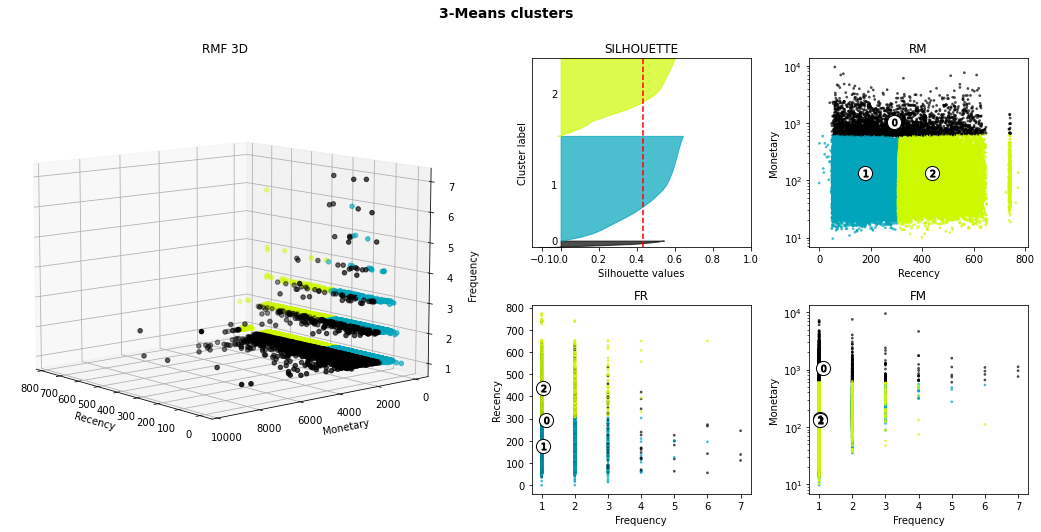

In [5]:
from olist_commons import plot_kmeans_rfm_clusters
plot_kmeans_rfm_clusters(
    rfm, rfm_labels, rfm_centers,
    clu_labels, slh_avg, slh_vals)

## 2} k-Means for $k$ in `range(2, 16)`

### 2-Means

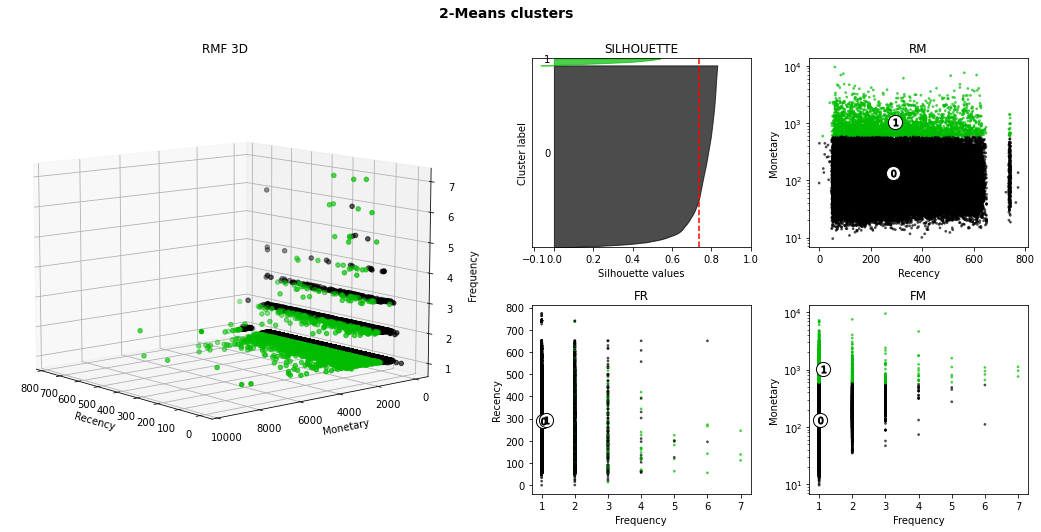

With 2 clusters | Silhouette average : 0.735673652785341 k-means fit time : 1.4850008487701416 silouhette compute time : 225.04730796813965


In [2]:
from olist_commons import kmeans_analysis
kmeans_analysis(crfm_1, 2)

### 3-Means

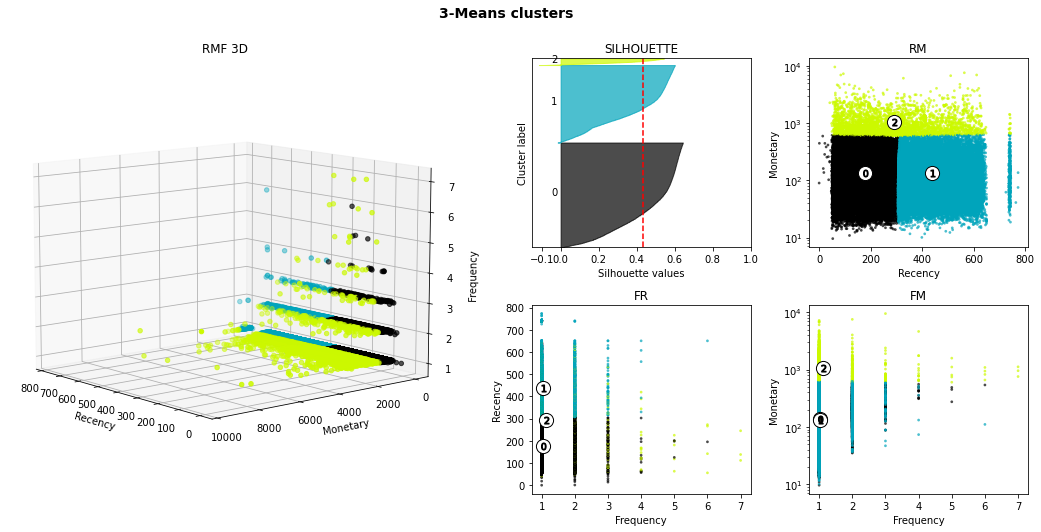

silhouette average : 0.435
k-means fit time : 1.443
silouhette compute time : 230.439


In [3]:
from olist_commons import kmeans_analysis
kmeans_analysis(crfm_1, 3)

### 4-Means

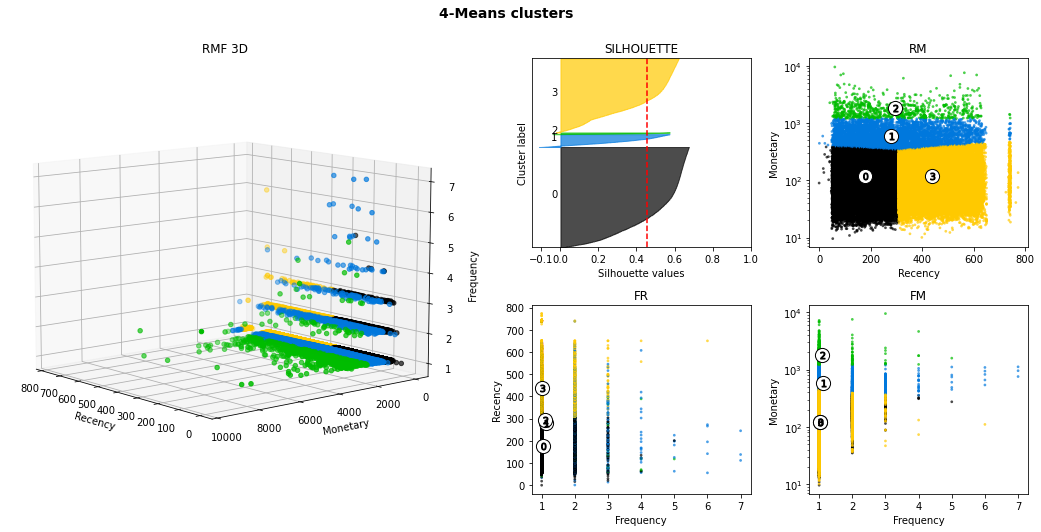

silhouette average : 0.458
k-means fit time : 1.95
silouhette compute time : 238.949


(0.4578599306425743, 1.9500014781951904, 238.94900155067444)

In [3]:
from olist_commons import kmeans_analysis
kmeans_analysis(crfm_1, 4)

### 5-Means

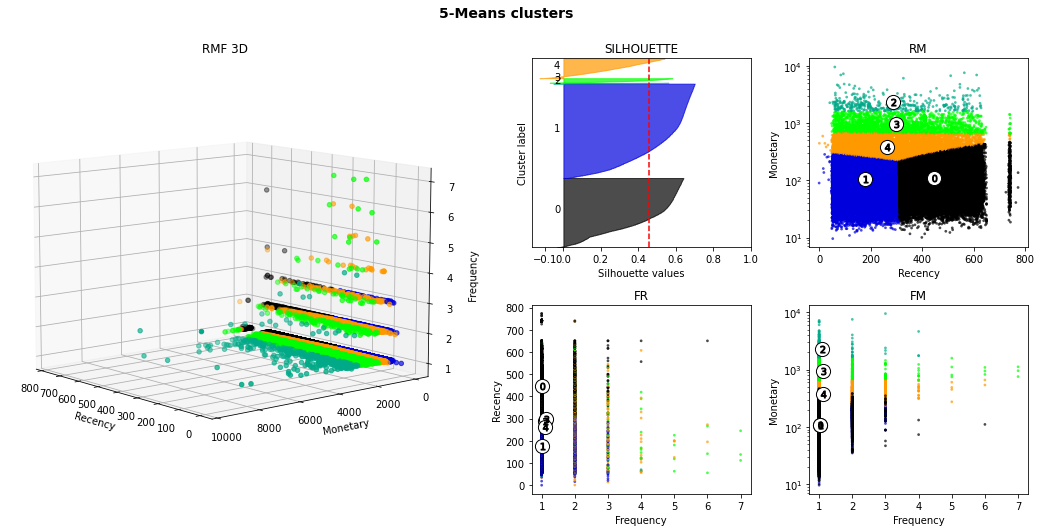

silhouette average : 0.457
k-means fit time : 1.775
silouhette compute time : 221.151


(0.45725540040842555, 1.7749991416931152, 221.15143251419067)

In [4]:
from olist_commons import kmeans_analysis
kmeans_analysis(crfm_1, 5)

### 6-Means

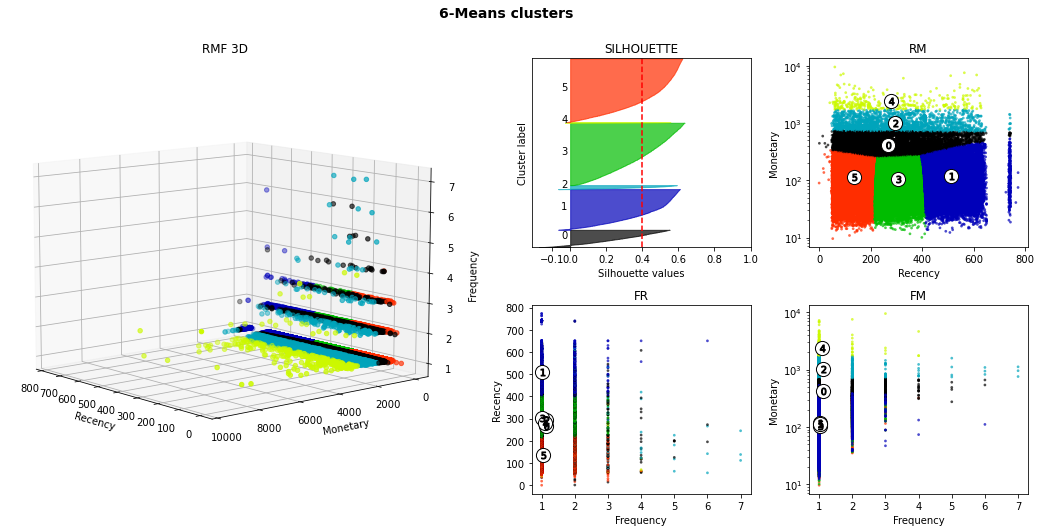

silhouette average : 0.397
k-means fit time : 2.486
silouhette compute time : 207.909


(0.39734317964667637, 2.4859917163848877, 207.9090142250061)

In [5]:
from olist_commons import kmeans_analysis
kmeans_analysis(crfm_1, 6)

### 7, 8, 9, 10, 11, 12, 13, 14, 15-Means

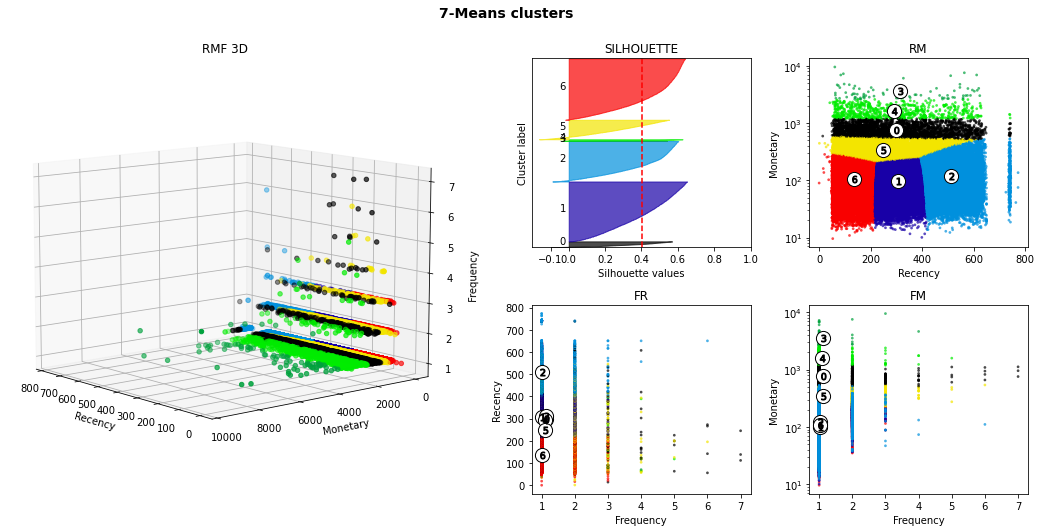

silhouette average : 0.403
k-means fit time : 2.325
silouhette compute time : 196.408


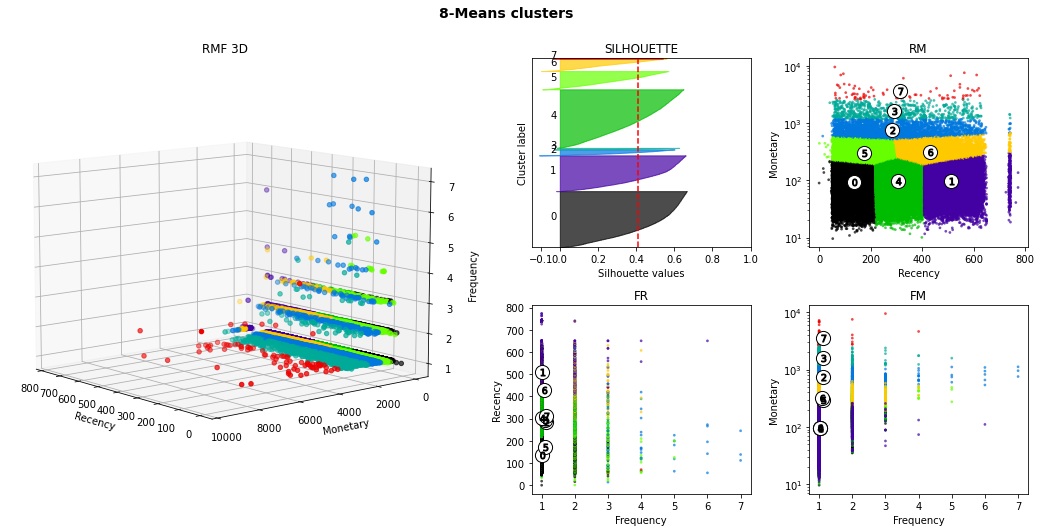

silhouette average : 0.408
k-means fit time : 2.094
silouhette compute time : 194.648


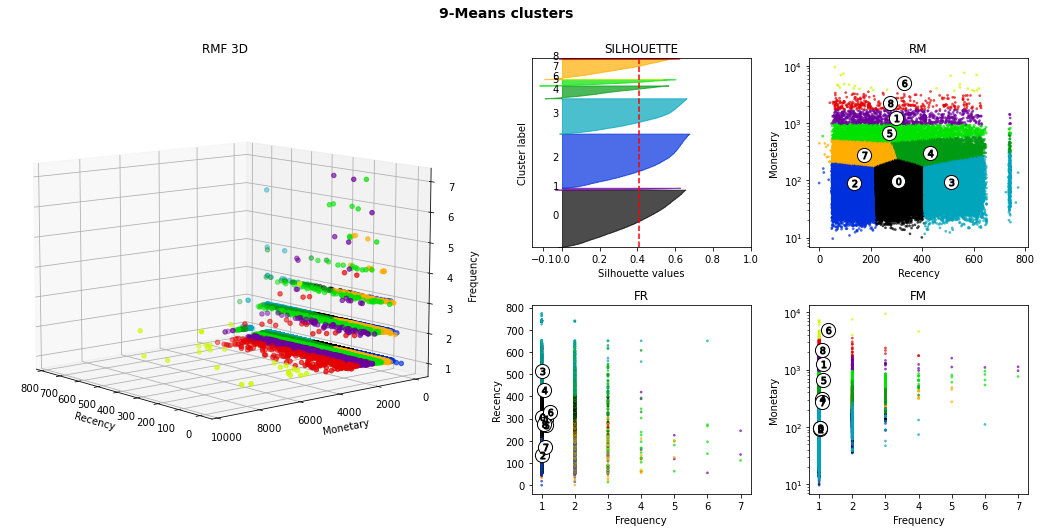

silhouette average : 0.407
k-means fit time : 2.986
silouhette compute time : 228.648


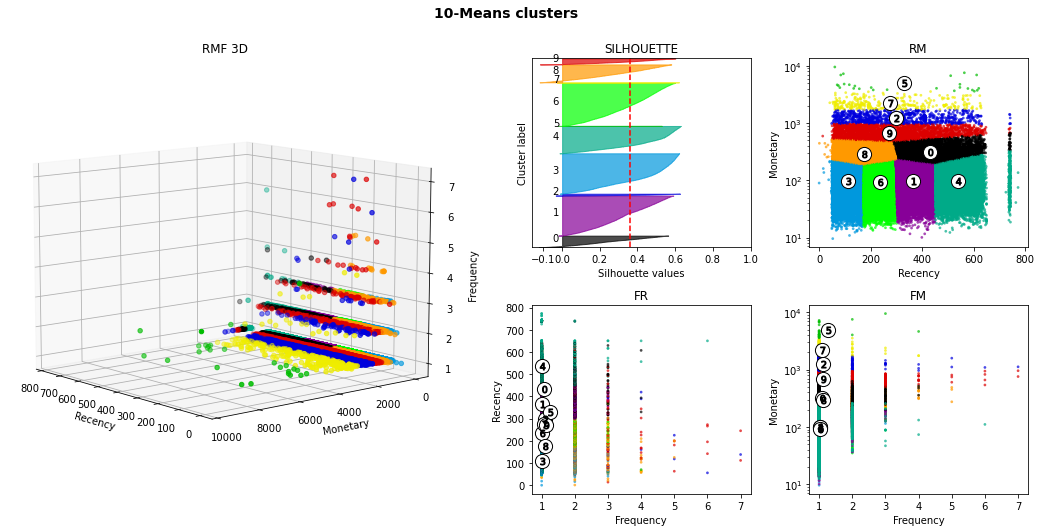

silhouette average : 0.36
k-means fit time : 2.987
silouhette compute time : 236.429


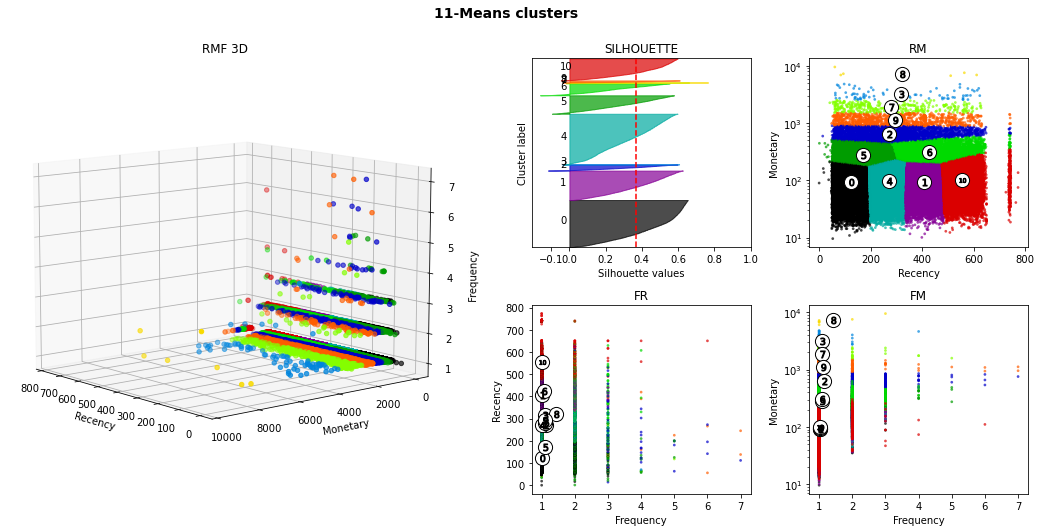

silhouette average : 0.365
k-means fit time : 3.301
silouhette compute time : 242.103


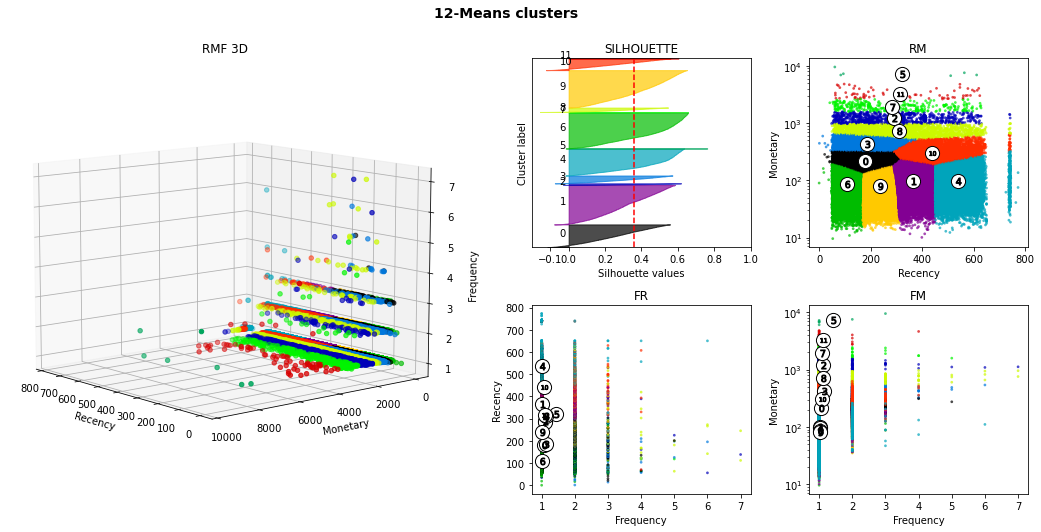

silhouette average : 0.362
k-means fit time : 3.418
silouhette compute time : 240.149


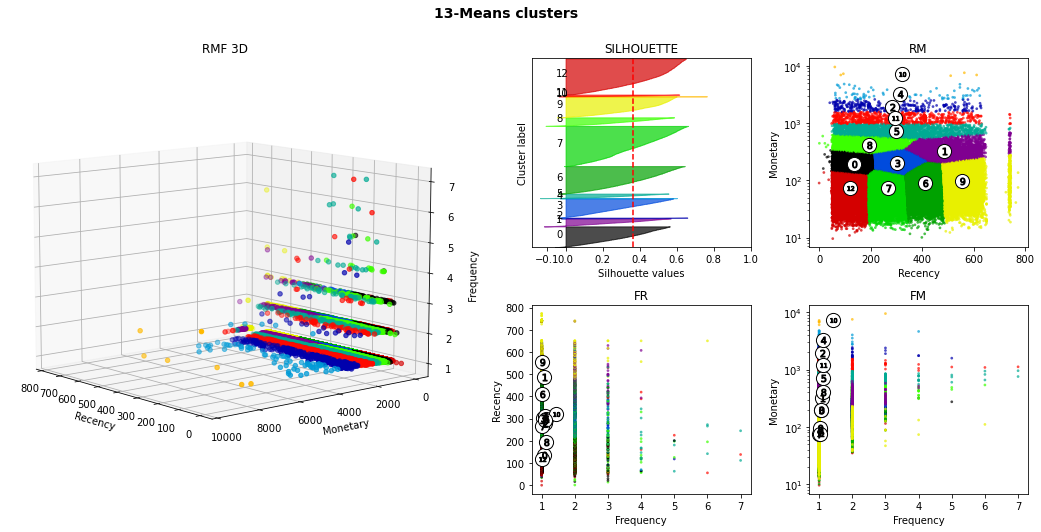

silhouette average : 0.366
k-means fit time : 3.538
silouhette compute time : 225.59


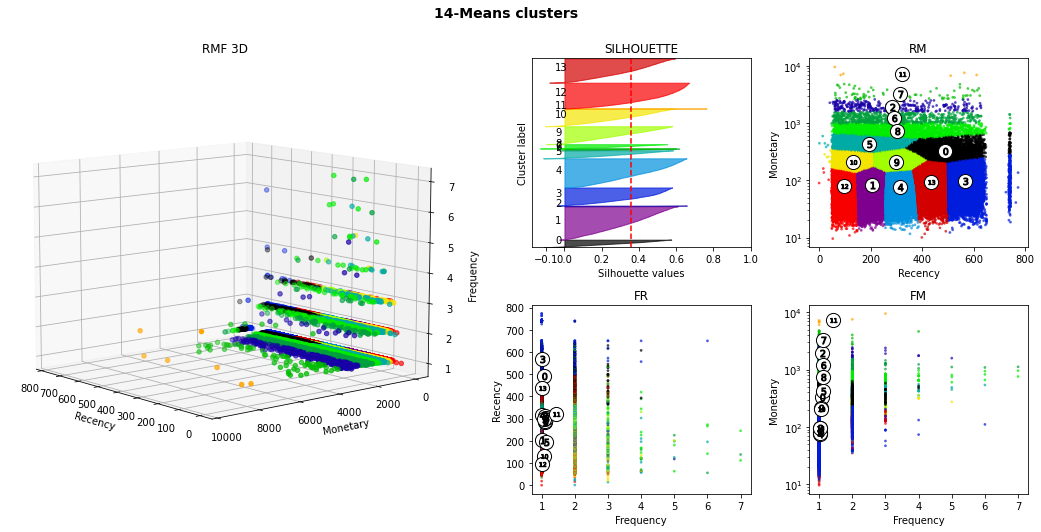

silhouette average : 0.356
k-means fit time : 3.457
silouhette compute time : 221.988


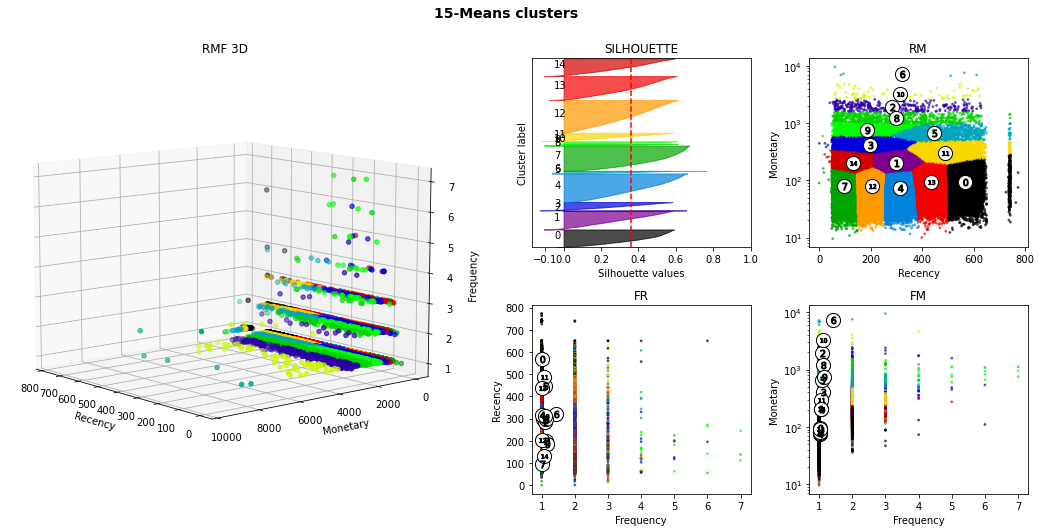

silhouette average : 0.359
k-means fit time : 3.608
silouhette compute time : 215.921


In [6]:
from olist_commons import kmeans_analysis
for n in range(7, 16):
    kmeans_analysis(crfm_1, n)

# **Milestone 4** : Contrat de maintenance – Simulations

## Conseils

**Livrable** : Notebook de simulation d’évolution des clusters

**Charge** : 30%

**Problèmes et erreurs courants** :
* ⚠ Erreur consistant à ne pas utiliser le « transformer » StandardScaler du fichier qui a servi à l’entraînement du modèle (« fit » du modèle).
* ⚠ Erreur consistant à comparer des listes de clusters prédits à 2 dates différentes (cela ne concerne pas les mêmes clients et pas le même nombre, ni les mêmes données de clients).

**Recommandations** :
* **M41** [21/11] L’objectif est de déterminer au bout de combien de temps le modèle de clustering entraîné initialement proposé (donc « fit ») devient obsolète (quand les prédictions, « predict », ne sont plus pertinentes), nécessitant d’entraîner un nouveau modèle de clustering.
*  **M42** [21/11] Pour prendre un exemple, supposons que l’entraînement du modèle initial M0 ait été réalisé à T0 pour un fichier clients F0, qui donne la liste des numéros de clusters C0, CO=M0.fit(F0).
*  **M43** [21/11] À T1=T0 +n jours, un nouveau modèle M1 est entraîné sur le nouveau fichier clients F1 à T1, et donne une nouvelle liste de clusters C1, C1_new = M1.fit(F1).
*  **M44** [21/11] Si on utilise le modèle initial M0, à T1 la prédiction des numéros de clusters du fichier F1 des clients à T1 donne C1_init = M0.predict(F1).
*  **M45** [21/11] Il s’agit de comparer les numéros de clusters à T1 du fichier F1, selon que l’on utilise le modèle initial créé à T0(M0) via un « predict », ou le modèle créé à T1 via un « fit ».
Pour un k-means, les numéros de clusters ne correspondent pas forcément d’une simulation à l’autre. Pour mesurer la divergence des clusters, il est conseillé d’utiliser l’ARI, indépendant de la numérotation des clusters.
*  **M46** [21/11] Il s’agit donc de simuler plusieurs périodes T1, T2 à Tt, et d’afficher l’évolution de l’ARI. Si l’ARI passe en dessous de 0.8 (correspond environ à 0,9 en accuracy), il est sûrement pertinent de reproposer un entraînement de modèle au client.
*  **M47** [21/11] Le fichier clients Fi à date Ti sera créé à partir de toutes les commandes passées jusqu’à Ti. Une fonction permettra de générer ce fichier juste en passant la date du fichier (filtrage de toutes les commandes jusqu’à Ti et création des features).
*  **M48** [21/11] Attention, les fichiers Fi sont les fichiers clients transformés par un StandardScaler, celui qui a servi à standardiser les données d’entraînement du modèle concerné. Donc pour le calcul de C1_init, il faut utiliser le StandardScaler du modèle M0 (fit sur le F0), et pour C1_new, celui du M1 (fit sur le F1).
*  **M49** [21/11] Le délai entre 2 simulations (« n jours » entre Ti et Ti+1) doit être suffisamment court pour déterminer assez précisément le délai de maintenance du modèle (1 semaine, 15 jours).
*  **M410** [21/11] La date de début T0 doit être la plus proche possible de la date de fin du fichier (août 2018), tout en intégrant le délai de simulation de maintenance, non connu au départ. Il faudra donc procéder par itération. Par exemple tester avec T0 au 31/12/2017, et si le délai de maintenance déterminé est de 3 mois (ARI <0.8), refaire une simulation à T0 = août 2018 – 3 ou 4 mois, soit avril ou mai 2018, pour finir la simulation courant août au plus près de la date du fichier complet.
*  **M411** [21/11] Une autre solution est de faire une simulation en marche arrière, en faisant attention à faire le « predict » sur le modèle le plus ancien.
*  **M412** [21/11] Il peut être intéressant, mais pas obligatoire, de calculer l’accuracy à la place de l’ARI, ce qui nécessite de « recaler » les numéros de clusters entre les 2 listes. Ceci peut se faire en réalisant une matrice de confusion et en utilisant la fonction argmax() pour déterminer la translation de numéro de cluster. Cette transformation ne fonctionne que si l’accuracy est élevée.
*  **M413** [21/11] Il peut être intéressant, mais pas obligatoire, de regarder la divergence des clusters par numéro de cluster, le but étant de s’assurer de la stabilité en priorité des clusters de « bons clients ».

**Ressources** :
* ARI : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

## Tips

**Deliverable**: Cluster evolution simulation notebook

**Load**: 30%

**Common problems and errors**:
* ⚠ Error consisting of not using the StandardScaler "transformer" of the file that was used to train the model ("fit" of the model).
* ⚠ Error consisting in comparing lists of predicted clusters on 2 different dates (this does not concern the same customers and not the same number, nor the same customer data).

**Recommendations**:
* **M41** [21/11] The objective is to determine after how long the trained clustering model initially proposed (therefore "fit") becomes obsolete (when the predictions, "predict", are no longer relevant), requiring the training of a new clustering model.
* **M42** [21/11] To take an example, suppose that the training of the initial model M0 was carried out at T0 for a client file F0, which gives the list of cluster numbers C0, CO=M0. fit(F0).
* **M43** [21/11] At T1=T0 +n days, a new model M1 is trained on the new customer file F1 at T1, and gives a new list of clusters C1, C1_new = M1.fit(F1 ).
* **M44** [21/11] If we use the initial model M0, at T1 the prediction of the cluster numbers of the file F1 of the clients at T1 gives C1_init = M0.predict(F1).
* **M45** [21/11] This involves comparing the cluster numbers at T1 of the F1 file, depending on whether the initial model created at T0(M0) via a "predict" is used, or the model created at T1 via a "fit".
For a k-means, the cluster numbers do not necessarily correspond from one simulation to another. To measure the divergence of the clusters, it is advisable to use the ARI, independent of the numbering of the clusters.
* **M46** [21/11] It is therefore a question of simulating several periods T1, T2 to Tt, and of displaying the evolution of the ARI. If the ARI falls below 0.8 (corresponds to approximately 0.9 in accuracy), it is surely appropriate to offer model training to the client again.
* **M47** [21/11] The Fi customer file on date Ti will be created from all orders placed up to Ti. A function will generate this file just by passing the date of the file (filtering of all orders up to Ti and creation of features).
* **M48** [21/11] Attention, Fi files are client files transformed by a StandardScaler, the one that was used to standardize the training data of the model concerned. So for the calculation of C1_init, you must use the StandardScaler of the M0 model (fit on the F0), and for C1_new, that of the M1 (fit on the F1).
* **M49** [21/11] The time between 2 simulations (“n days” between Ti and Ti+1) must be short enough to determine the model maintenance time fairly accurately (1 week, 15 days).
* **M410** [21/11] The start date T0 must be as close as possible to the end date of the file (August 2018), while integrating the maintenance simulation time, which was not known at the start. It will therefore be necessary to proceed by iteration. For example, test with T0 on 31/12/2017, and if the determined maintenance period is 3 months (ARI <0.8), repeat a simulation at T0 = August 2018 – 3 or 4 months, i.e. April or May 2018, to finish the simulation in August as close as possible to the date of the complete file.
* **M411** [21/11] Another solution is to run a simulation in reverse, being careful to do the "predict" on the oldest model.
* **M412** [21/11] It may be interesting, but not mandatory, to calculate the accuracy instead of the ARI, which requires “resetting” the cluster numbers between the 2 lists. This can be done by making a confusion matrix and using the argmax() function to determine the cluster number translation. This transformation only works if the accuracy is high.
* **M413** [21/11] It may be interesting, but not mandatory, to look at the divergence of clusters by cluster number, the goal being to ensure the stability of the clusters of "good customers" as a priority .

**Resources** :
* ARI: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html